In [1]:
import csv
import codecs
import urllib.request
from collections import Counter
import glob
import codecs
import re
import pandas as pd
import math
from cmath import exp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.pyplot import *
from numpy.linalg import inv
from statsmodels.tsa.seasonal import seasonal_decompose
# sns.set_theme(context='notebook')
# plt.rcParams.update(plt.rcParamsDefault)
sns.reset_orig()

In [2]:
def nicePrint(x):
    with np.printoptions(precision=8, suppress=True, formatter={'float': '{:0.4f}'.format}, linewidth=100):
        print(x)

<h1> Question 1-1

<h1>Time Series Exploration : Try to understand the time series dataset uploaded along with
the exercise. This involves (but is not limited to) plotting the multivariate time series (time on x-axis)
clearly labelled and formatted, understanding how the multivariate time series interacts, understanding
the correlation between the different variables, plots for variable density functions, identifying inherent
seasonality or trend etc.

In [3]:
import pandas as pd
df = pd.read_csv("time_series.csv", index_col='date', parse_dates=True)
# print(df.to_string()) 
df.head()

X1     X2     X3     X4     X5     X6          Y
date                                                                    
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000

In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'], dtype='object')

<h3> Doing df.describe in order to understand the data

In [5]:
df.describe()

X1            X2            X3            X4            X5  \
count  17420.000000  17420.000000  17420.000000  17420.000000  17420.000000   
mean       7.375141      2.242242      4.300239      0.881568      3.066062   
std        7.067744      2.042342      6.826978      1.809293      1.164506   
min      -22.705999     -4.756000    -25.087999     -5.934000     -1.188000   
25%        5.827000      0.737000      3.296000     -0.284000      2.315000   
50%        8.774000      2.210000      5.970000      0.959000      2.833000   
75%       11.788000      3.684000      8.635000      2.203000      3.625000   
max       23.643999     10.114000     17.341000      7.747000      8.498000   

                 X6             Y  
count  17420.000000  17420.000000  
mean       0.856932     13.324672  
std        0.599552      8.566946  
min       -1.371000     -4.080000  
25%        0.670000      6.964000  
50%        0.975000     11.396000  
75%        1.218000     18.079000  
max        3.046000     46.007000

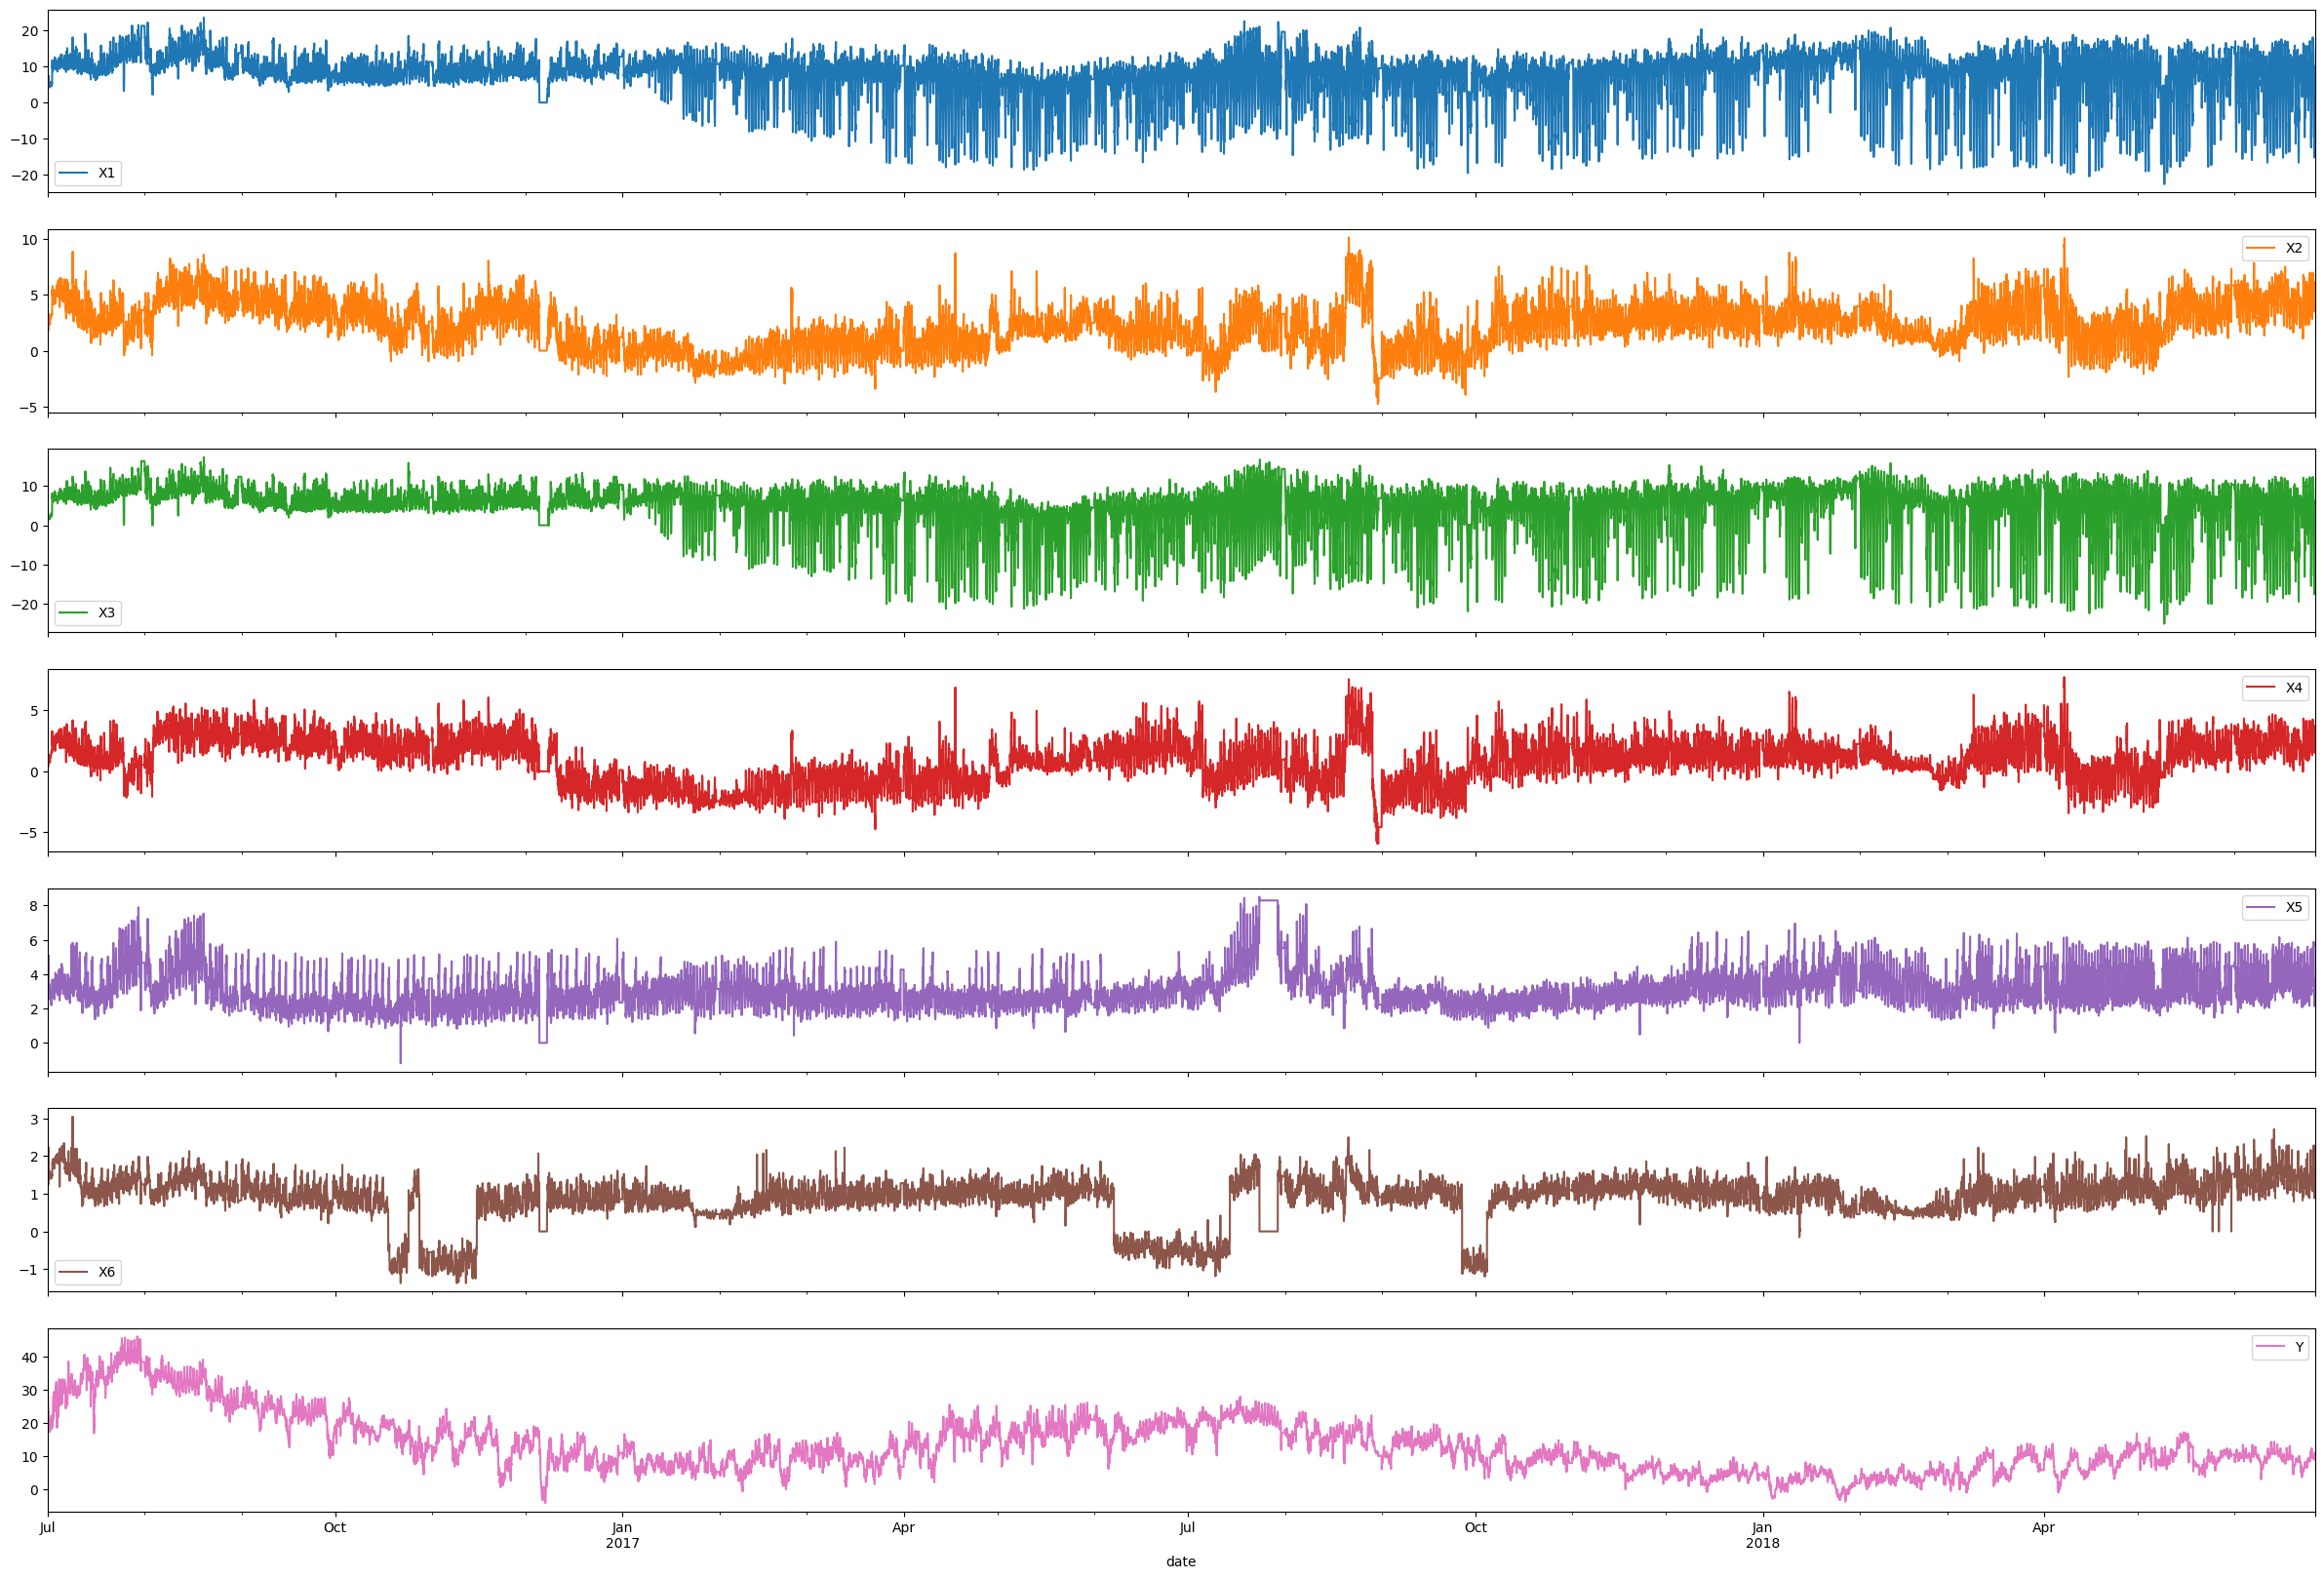

In [6]:
df.plot(figsize=(30,20), subplots = True)
plt.show()

<h3>Correlation

<h3> Computing correlations using spearman and kendall methods

In [7]:
features = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].reset_index(drop=True)
features.corr(method='kendall').style.background_gradient(cmap="Blues")

In [8]:
features = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].reset_index(drop=True)
features.corr(method='spearman').style.background_gradient(cmap="GnBu")

<h3>Density Plot

<h3> Density plot with shared x and y axes in order to allow for better comparison.

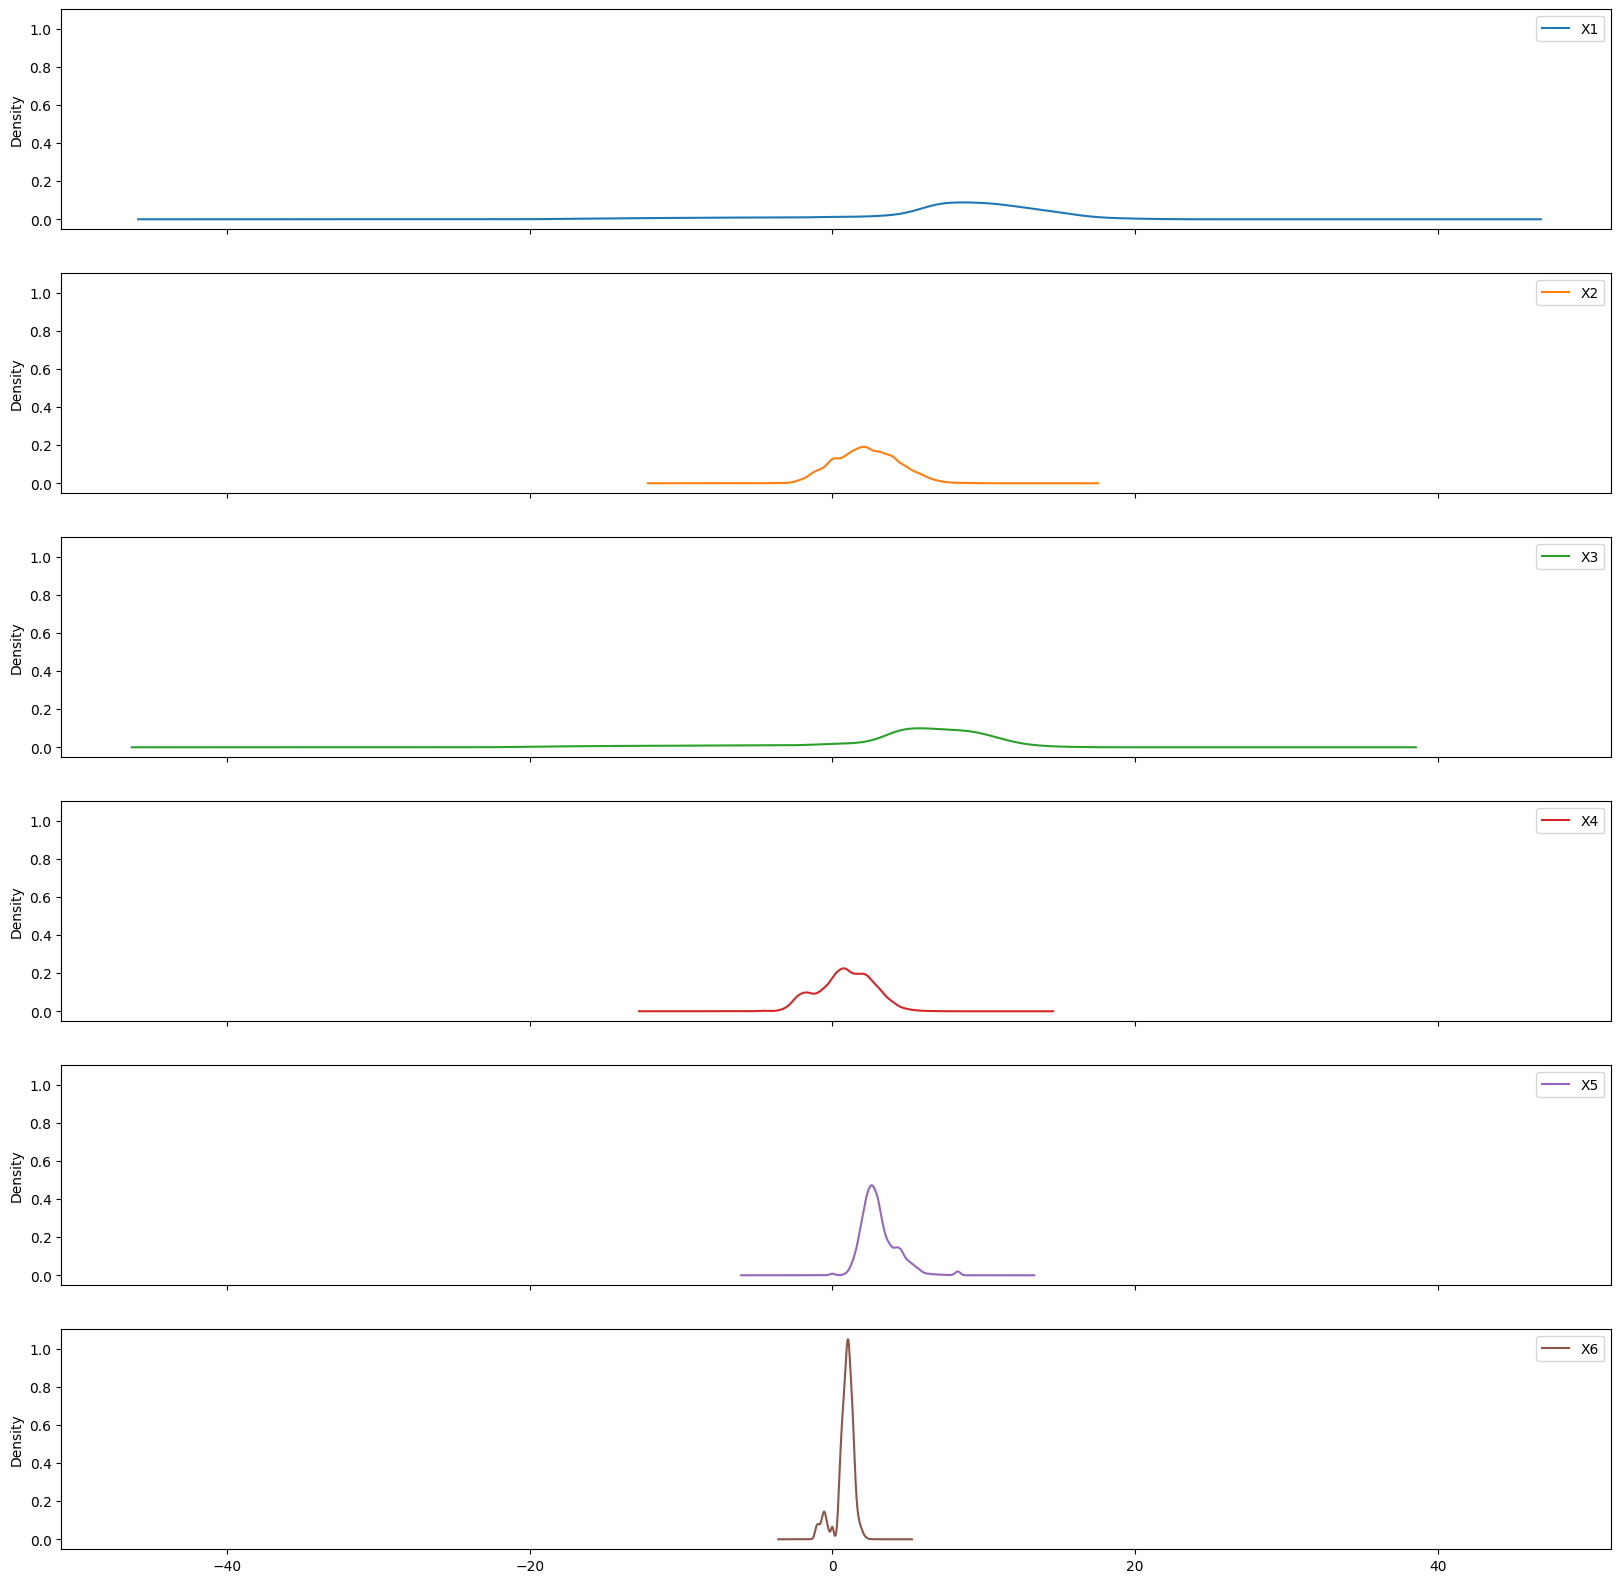

In [9]:
ax = features.plot.kde(figsize=(20,20), subplots=True, sharex=True, sharey=True)

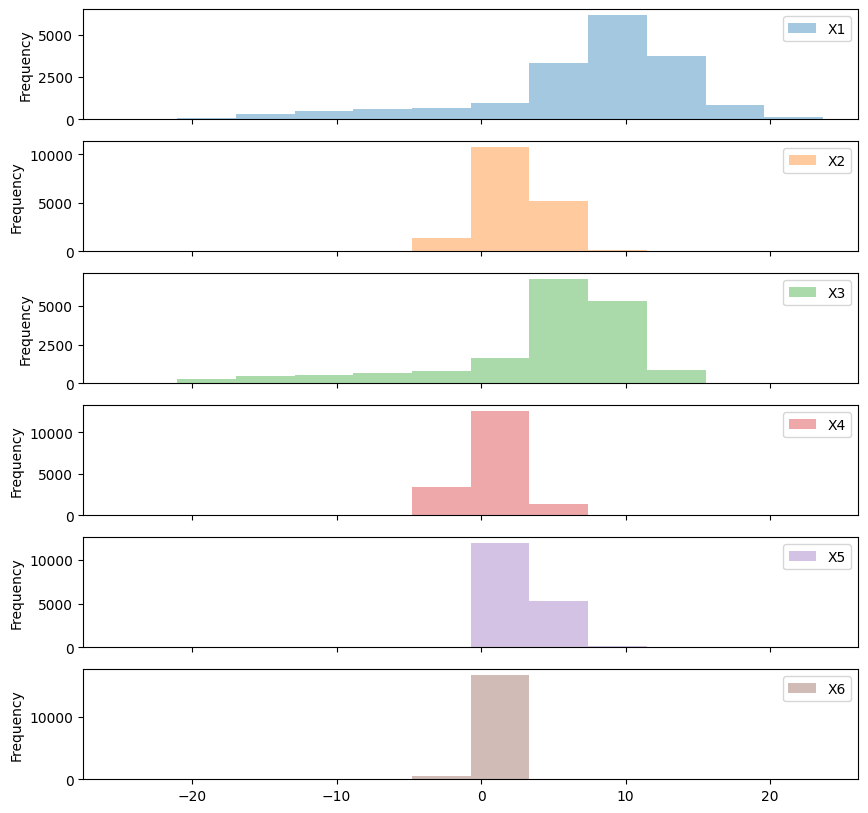

In [10]:
#Hist for features only
ax = features.plot.hist(bins=12, alpha=0.4, figsize=(10,10), subplots=True)

<h3>Histogram

<h3> Below is shown the histogram with shared x and y axis, that allows for a better comparison among the distributions of values in the feature vectors and the output vector

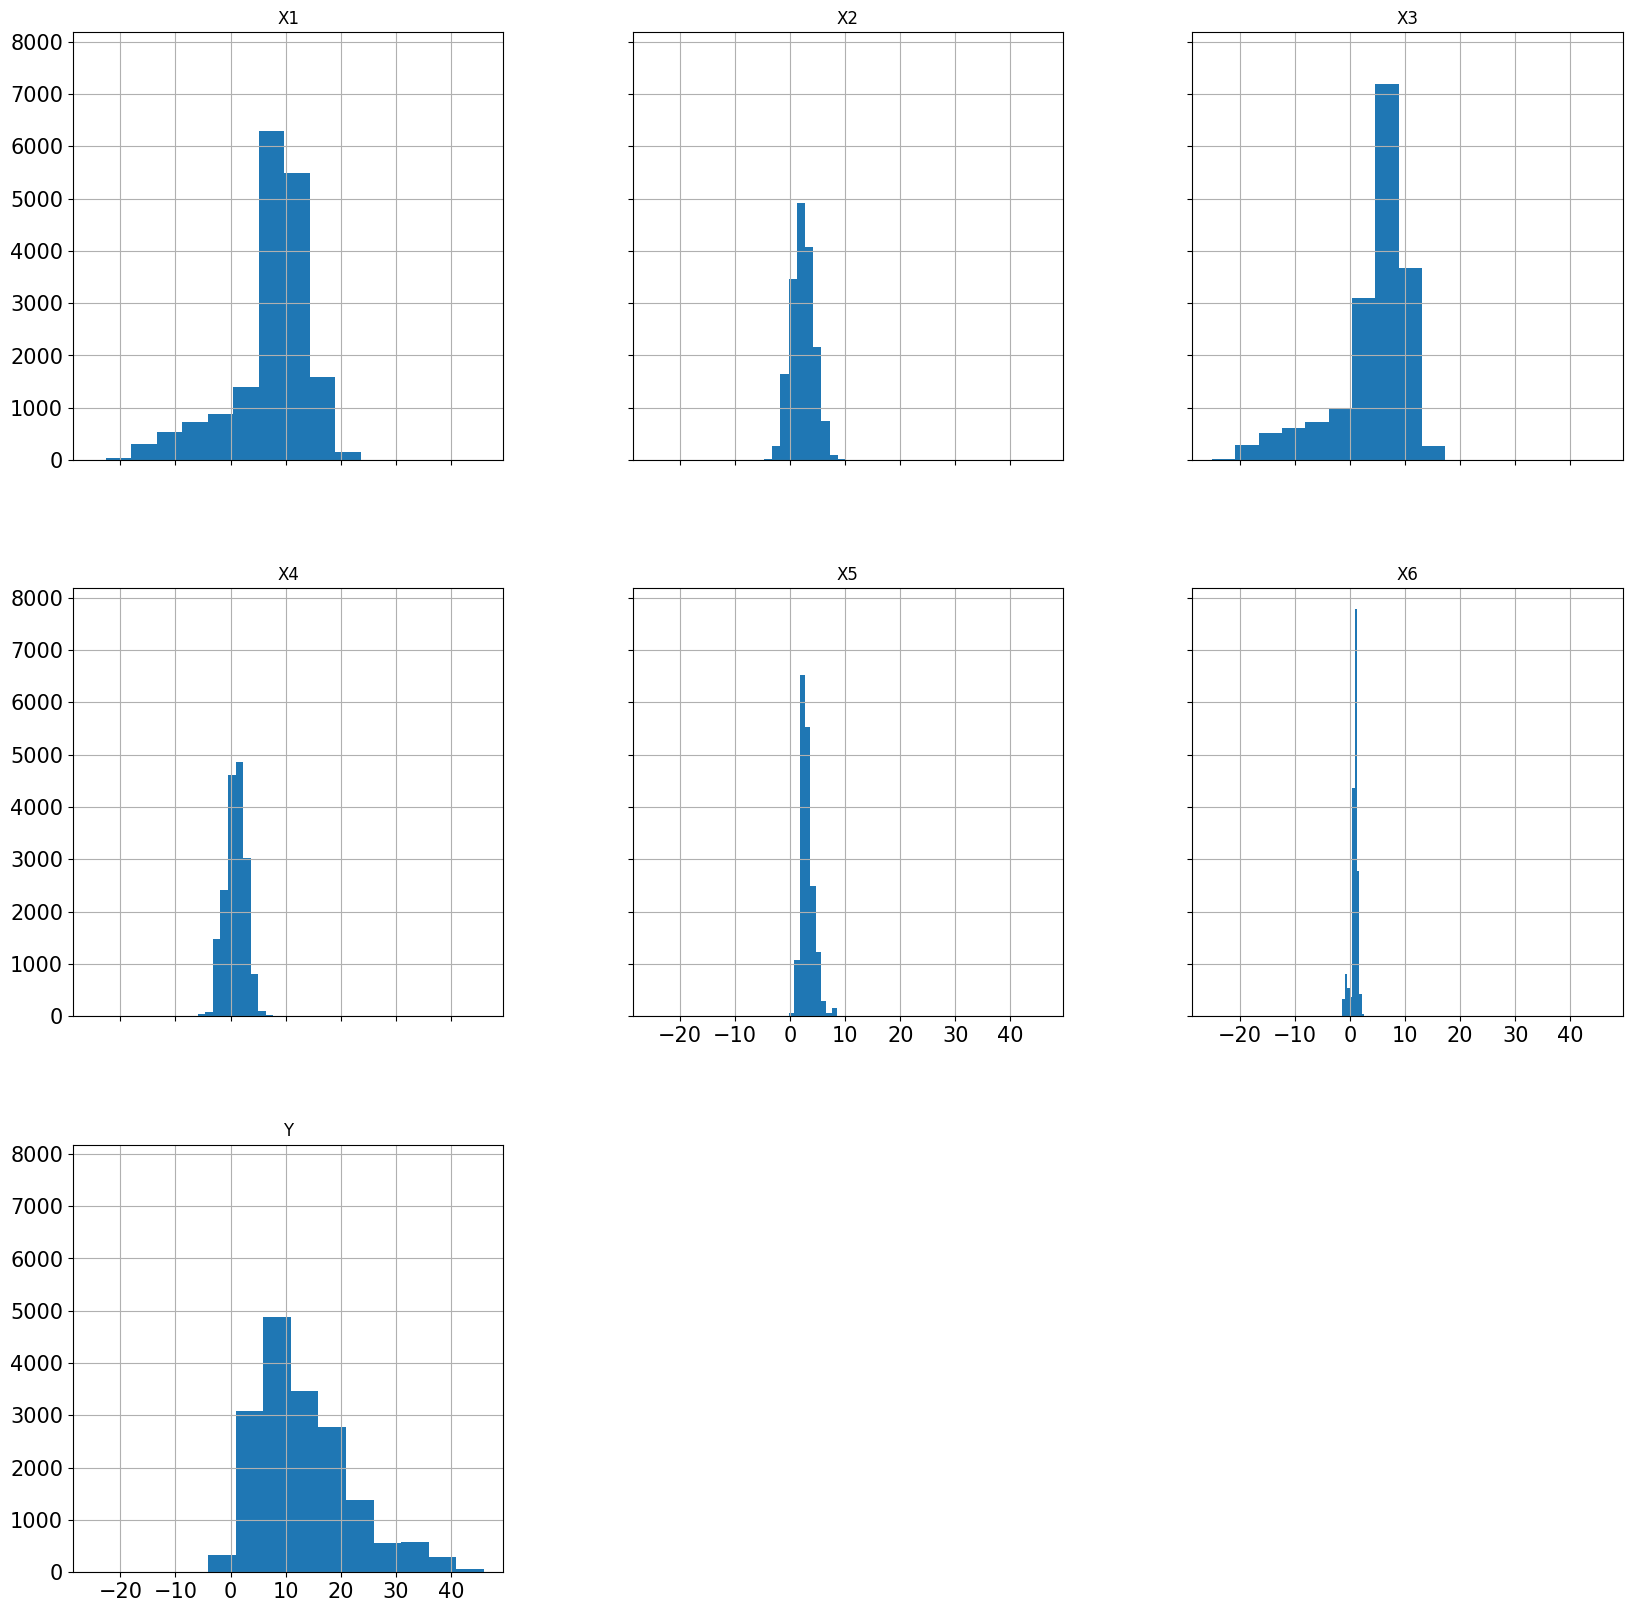

In [11]:
df.hist(figsize=(20,20), sharex=True, sharey=True, ylabelsize=15, xlabelsize=15)
plt.show()

In [12]:
# df.plot(subplots=True, sharex=True, figsize=(30,10), use_index=True)#, title=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'])
# plt.show()

In [13]:
# seasonality_df = df.loc[(df <= 0).all(axis=0), :]

In [14]:
# seasonality_df.head()

In [15]:
# # Creating a dataframe with "Date" and "A"
# # columns only. This dataframe is date indexed
# decomposition_dataframe = seasonality_df.copy()
# # decomposition_dataframe.set_index('date', inplace=True)
# # decomposition_dataframe.index = pd.to_datetime(decomposition_dataframe.index)
 
# # using sm.tsa library, we are plotting the
# # seasonal decomposition of the "A" column
# # Multiplicative Model : Y[t] = T[t] * S[t] * R[t]
# decomposition = sm.tsa.seasonal_decompose(features, model='multiplicative')
# decomp = decomposition.plot()
# decomp.suptitle('"A" Value Decomposition')

<h3> The negative values inhibit computation of multiplicative seasonality which is why I've only computed additive seasonality.

Resources:

https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861

https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621

https://datastud.dev/posts/python-seasonality-how-to

https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

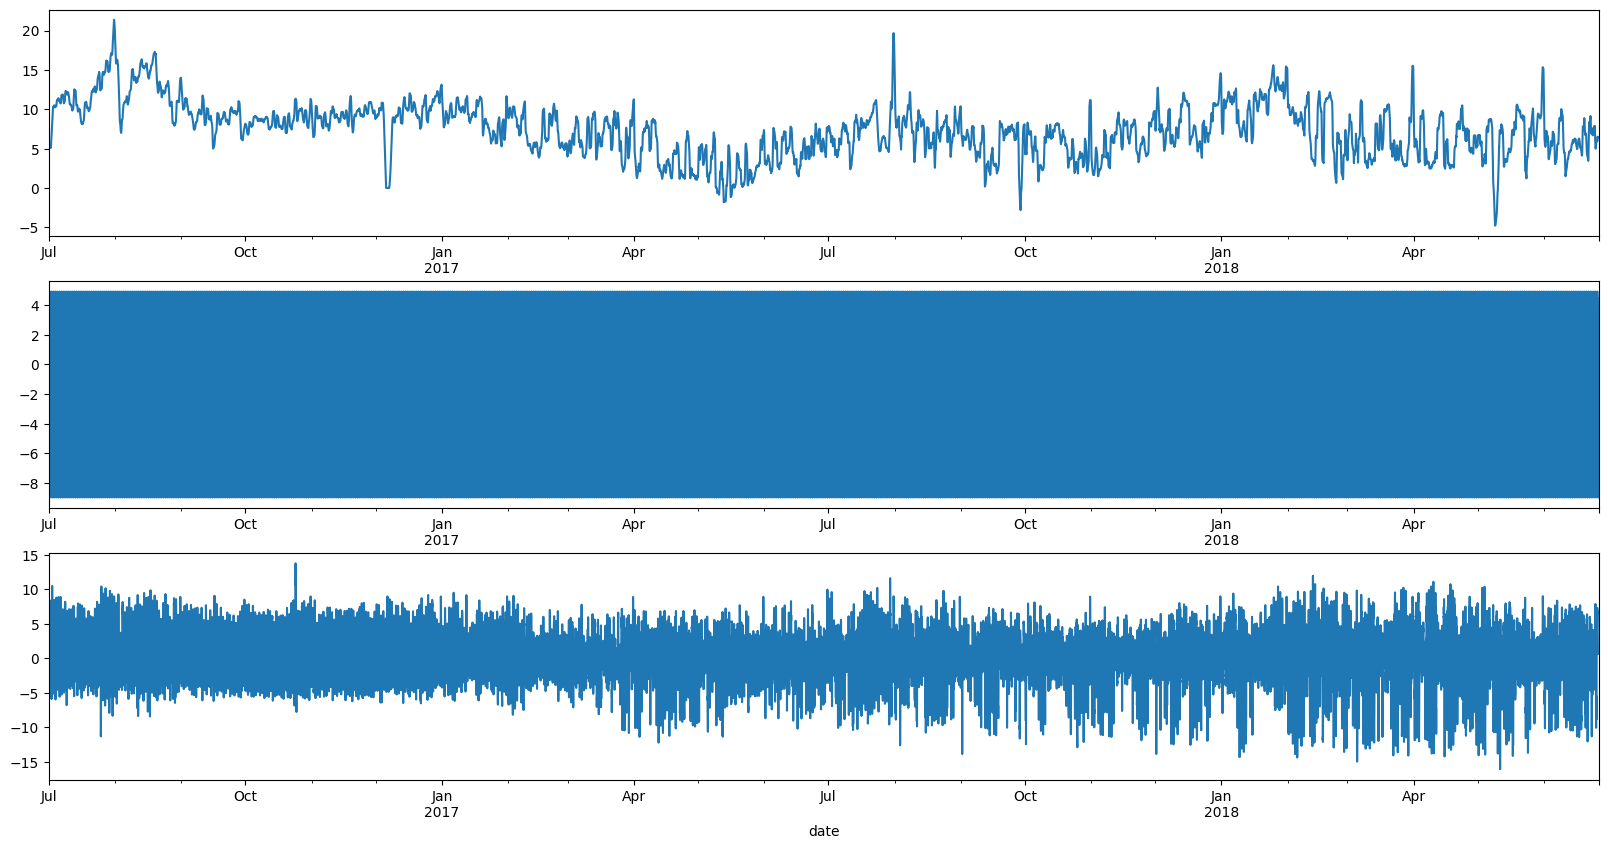

In [16]:
sd = df[['X1']]
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
decompose_result_mult = seasonal_decompose(sd, model="additive")
getTrend = decompose_result_mult.trend
getSeasonal = decompose_result_mult.seasonal
getResidual = decompose_result_mult.resid
getTrend.plot()
plt.subplot(3,1,2)
getSeasonal.plot()
plt.subplot(3,1,3)
getResidual.plot()
plt.show()

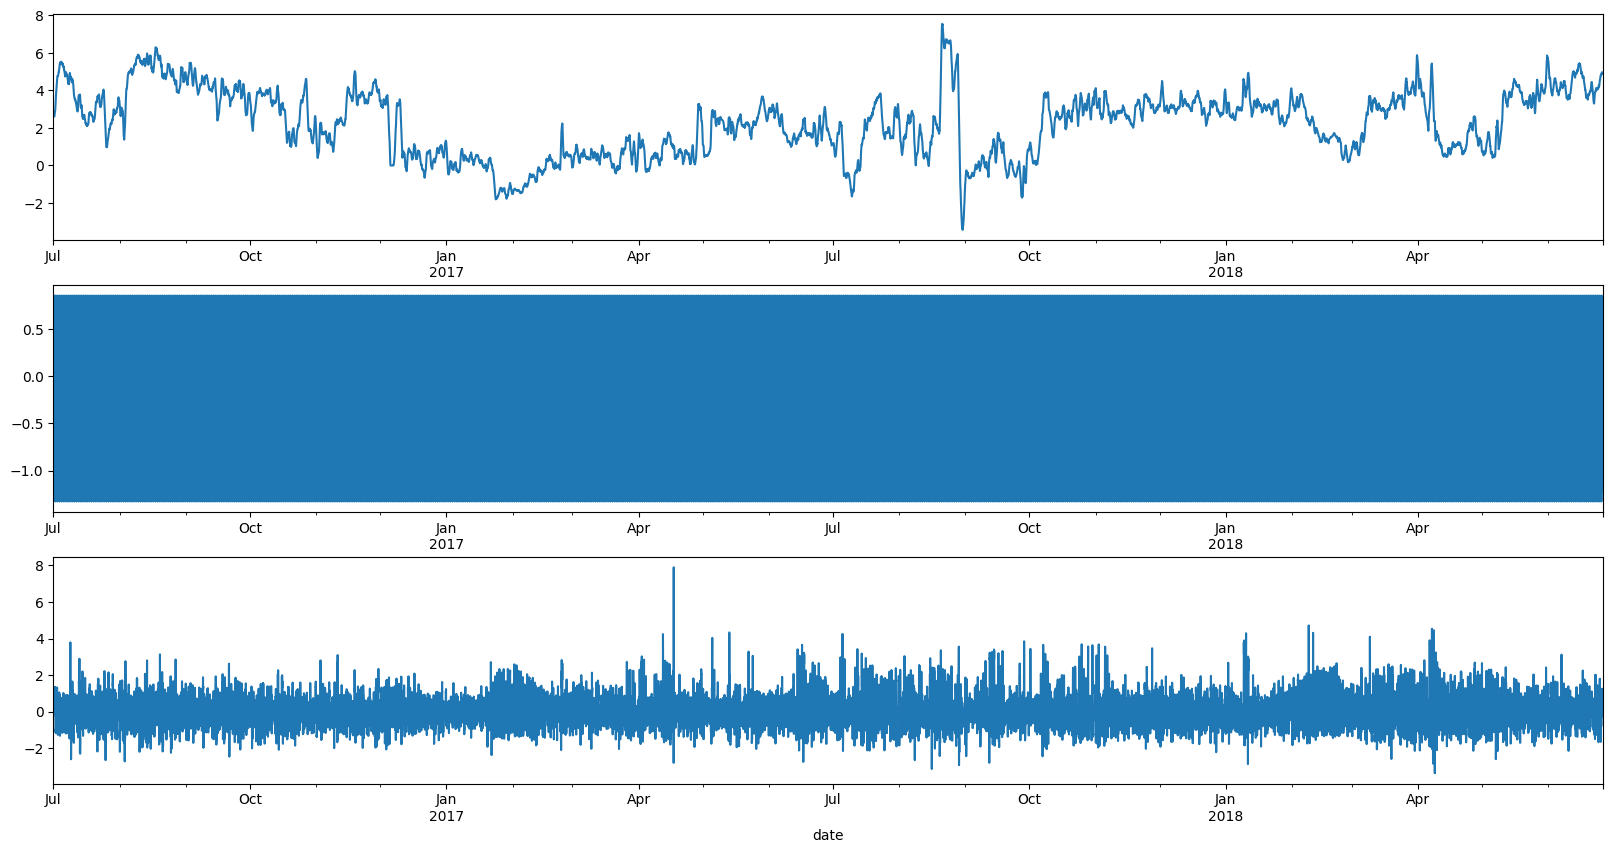

In [17]:
sd = df[['X2']]
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
decompose_result_mult = seasonal_decompose(sd, model="additive")
getTrend = decompose_result_mult.trend
getSeasonal = decompose_result_mult.seasonal
getResidual = decompose_result_mult.resid
getTrend.plot()
plt.subplot(3,1,2)
getSeasonal.plot()
plt.subplot(3,1,3)
getResidual.plot()
plt.show()

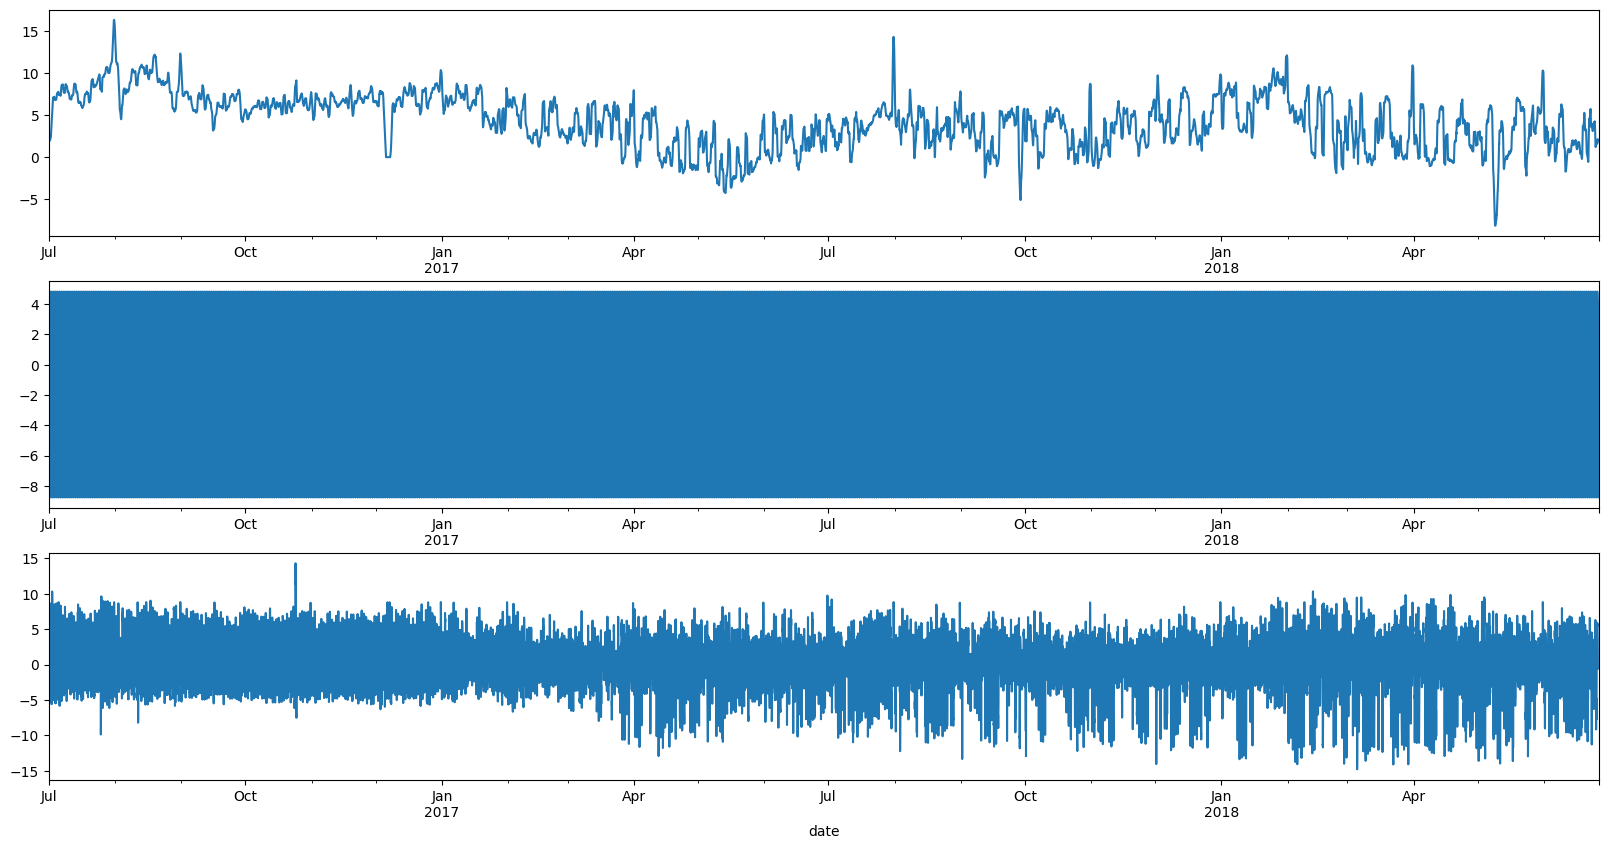

In [18]:
sd = df[['X3']]
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
decompose_result_mult = seasonal_decompose(sd, model="additive")
getTrend = decompose_result_mult.trend
getSeasonal = decompose_result_mult.seasonal
getResidual = decompose_result_mult.resid
getTrend.plot()
plt.subplot(3,1,2)
getSeasonal.plot()
plt.subplot(3,1,3)
getResidual.plot()
plt.show()

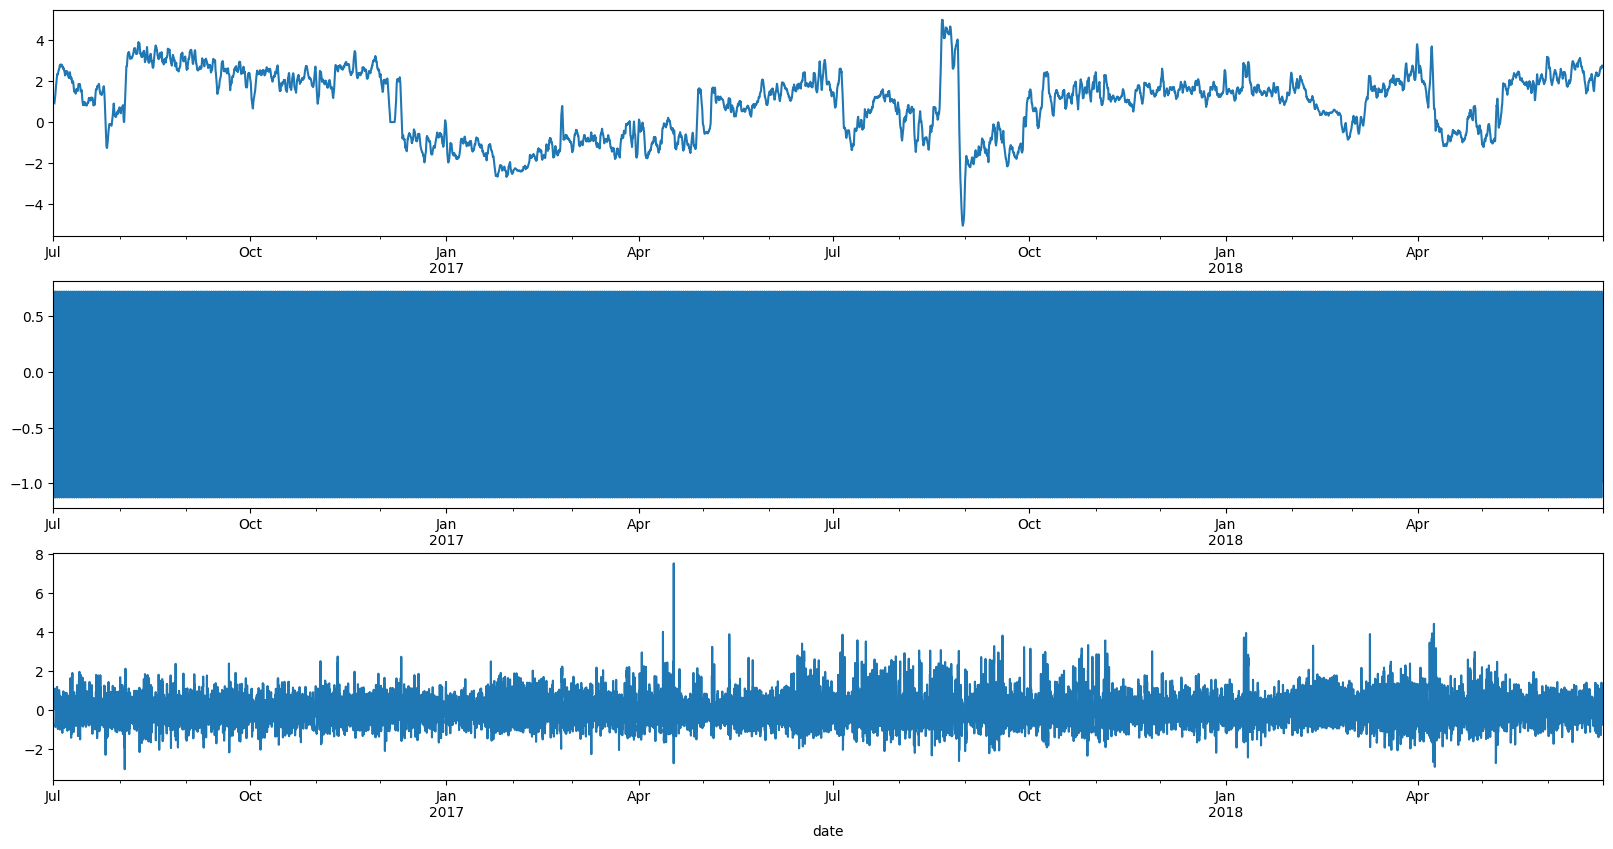

In [19]:
sd = df[['X4']]
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
decompose_result_mult = seasonal_decompose(sd, model="additive")
getTrend = decompose_result_mult.trend
getSeasonal = decompose_result_mult.seasonal
getResidual = decompose_result_mult.resid
getTrend.plot()
plt.subplot(3,1,2)
getSeasonal.plot()
plt.subplot(3,1,3)
getResidual.plot()
plt.show()

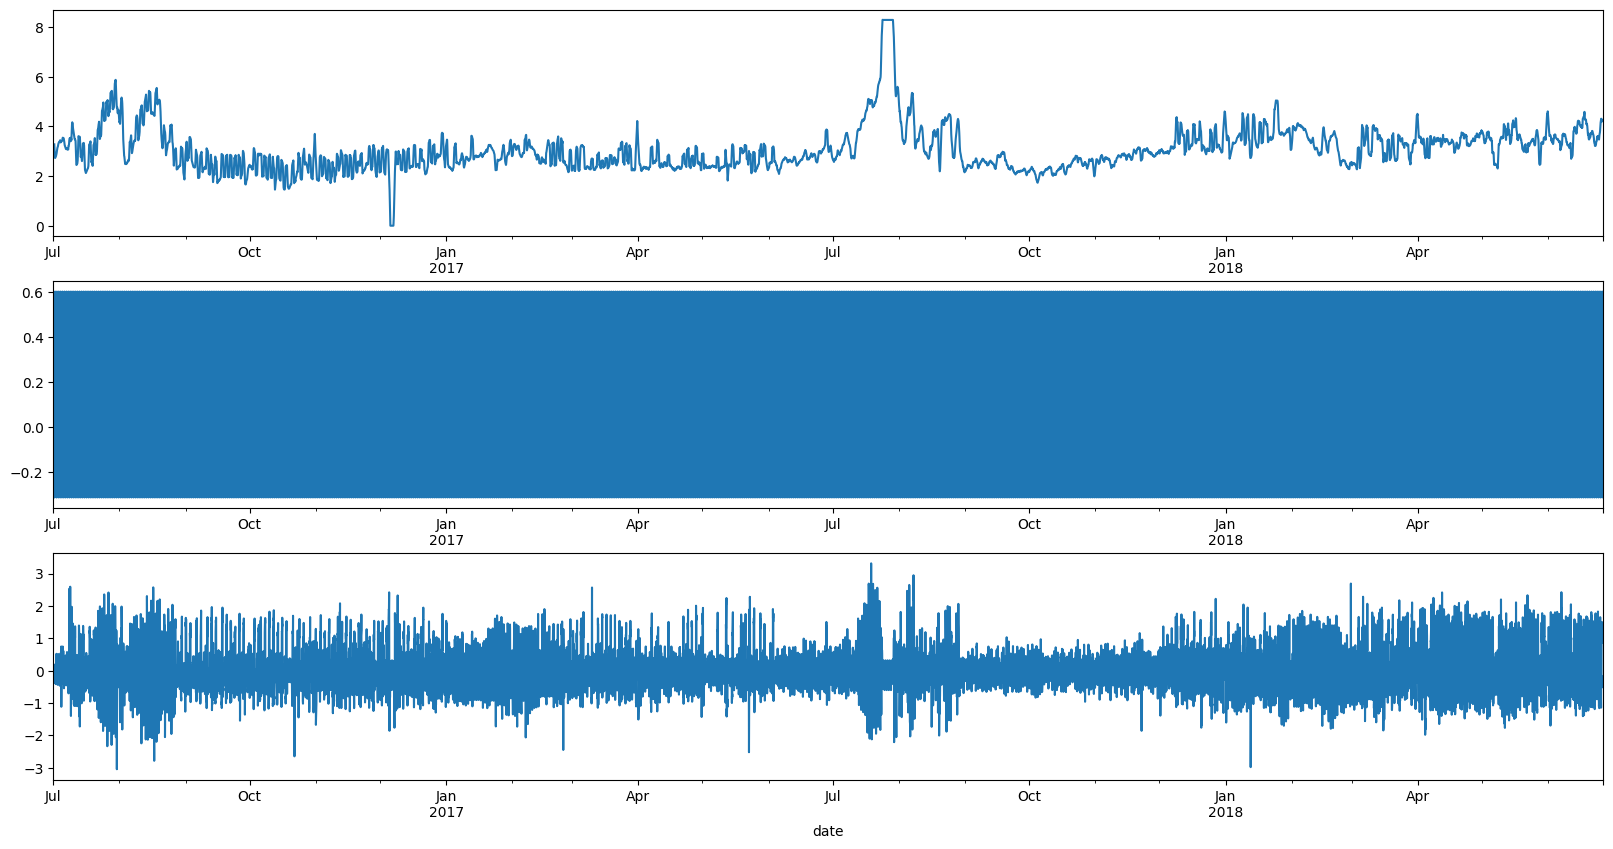

In [20]:
sd = df[['X5']]
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
decompose_result_mult = seasonal_decompose(sd, model="additive")
getTrend = decompose_result_mult.trend
getSeasonal = decompose_result_mult.seasonal
getResidual = decompose_result_mult.resid
getTrend.plot()
plt.subplot(3,1,2)
getSeasonal.plot()
plt.subplot(3,1,3)
getResidual.plot()
plt.show()

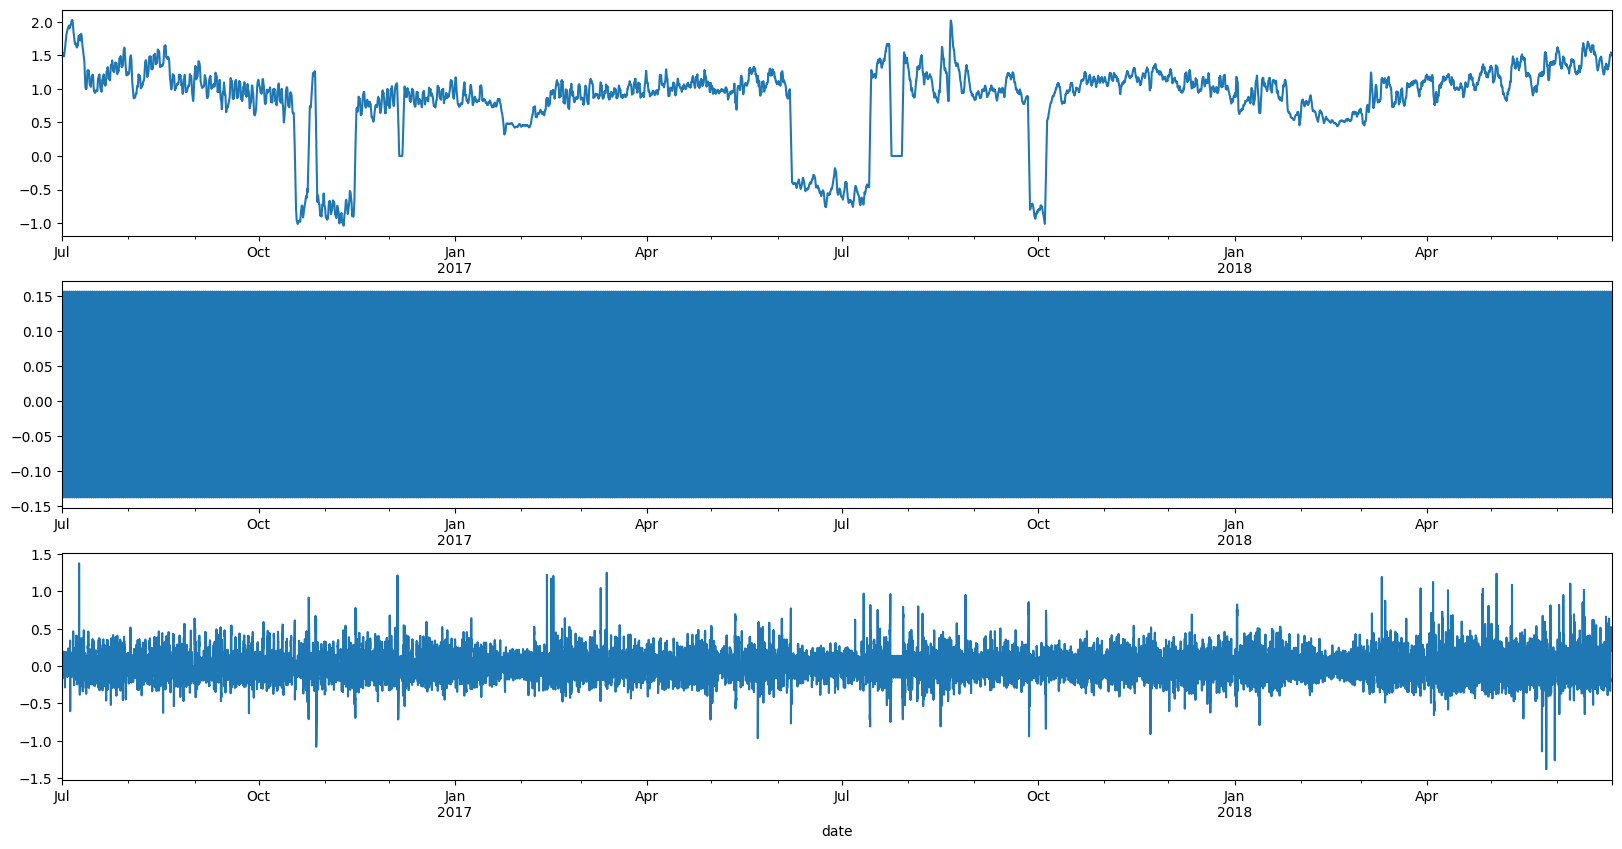

In [21]:
sd = df[['X6']]
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
decompose_result_mult = seasonal_decompose(sd, model="additive")
getTrend = decompose_result_mult.trend
getSeasonal = decompose_result_mult.seasonal
getResidual = decompose_result_mult.resid
getTrend.plot()
plt.subplot(3,1,2)
getSeasonal.plot()
plt.subplot(3,1,3)
getResidual.plot()
plt.show()

<h1> Question 1-2

<h2>Train/Test split : As a next step, try to split the data into train, validation and test by
considering the following rules

<h2>a) train end : 2017-06-26

<h2>b) val end : 2017-10-24

<h2>c) test end : 2018-02-21

<h2>Draw a single plot of the entire time series (for the target variable) and mark clearly within the plot, the
train end, the val end and the test end.
From now on, you are working with the train, test and validation dataset.

In [22]:
df_date = df


In [23]:
df.index = pd.to_datetime(df.index)
df.index = df.index.strftime("%Y-%m-%d")
df.head()

X1     X2     X3     X4     X5     X6          Y
date                                                           
2016-07-01  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01  5.358  1.942  1.492  0.462  3.868  1.279  21.948000

<h3> The method below was tiresome, instead df.loc turned out to be a simpler solution.

In [24]:
# df_date = df_date.reset_index(drop=True)

In [25]:
# df_date.head()

In [26]:
# train = df_date.loc[(df_date['date'] <= '2017-06-26')]
# val = df_date.loc[(df_date['date'] > '2017-06-26') & (df_date['date'] <= '2017-10-24')]
# test = df_date.loc[(df_date['date'] > '2017-10-24') & (df_date['date'] <= '2018-02-21')]

In [27]:
train = df.loc[:'2017-06-26']
val = df.loc['2017-06-27':'2017-10-24']
test = df.loc['2017-10-25':'2018-02-21']

In [28]:
len(train), len(val), len(test)

(8664, 2880, 2880)

In [29]:
train.head(1)

X1     X2     X3     X4     X5    X6       Y
date                                                       
2016-07-01  5.827  2.009  1.599  0.462  4.203  1.34  30.531

In [30]:
train.tail(1)

X1     X2     X3     X4     X5     X6      Y
date                                                        
2017-06-26  10.047  2.076  7.107  2.381  2.894 -0.396  20.33

In [31]:
val.head(1)

X1     X2     X3     X4    X5     X6          Y
date                                                           
2017-06-27  11.855  3.081  8.884  2.843  2.68 -0.487  19.697001

In [32]:
val.tail(1)

X1     X2     X3     X4     X5     X6      Y
date                                                        
2017-10-24  11.253  3.818  8.635  1.954  2.741  1.066  9.286

In [33]:
test.head(1)

X1    X2     X3     X4     X5     X6      Y
date                                                       
2017-10-25  10.315  2.88  8.599  2.274  2.102  1.005  9.145

In [34]:
test.tail(1)

X1     X2     X3     X4     X5     X6      Y
date                                                        
2018-02-21  13.061  1.875  9.452  0.711  3.655  0.487  5.206

In [35]:
train.head()

X1     X2     X3     X4     X5     X6          Y
date                                                           
2016-07-01  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01  5.358  1.942  1.492  0.462  3.868  1.279  21.948000

In [36]:
ticksList = list(df.index)
ticks = np.arange(0, 17420, 1742)
labels = []
for i in ticks:
    labels.append(ticksList[i])
# labels

<h3> Adding vertical splitters in the plot to improve visualization of the 3 splits of the data

In [37]:
trainEnd = (train.index)[-1]
valEnd = (val.index)[-1]
testEnd = (test.index)[-1]
dividList = [trainEnd, valEnd, testEnd]

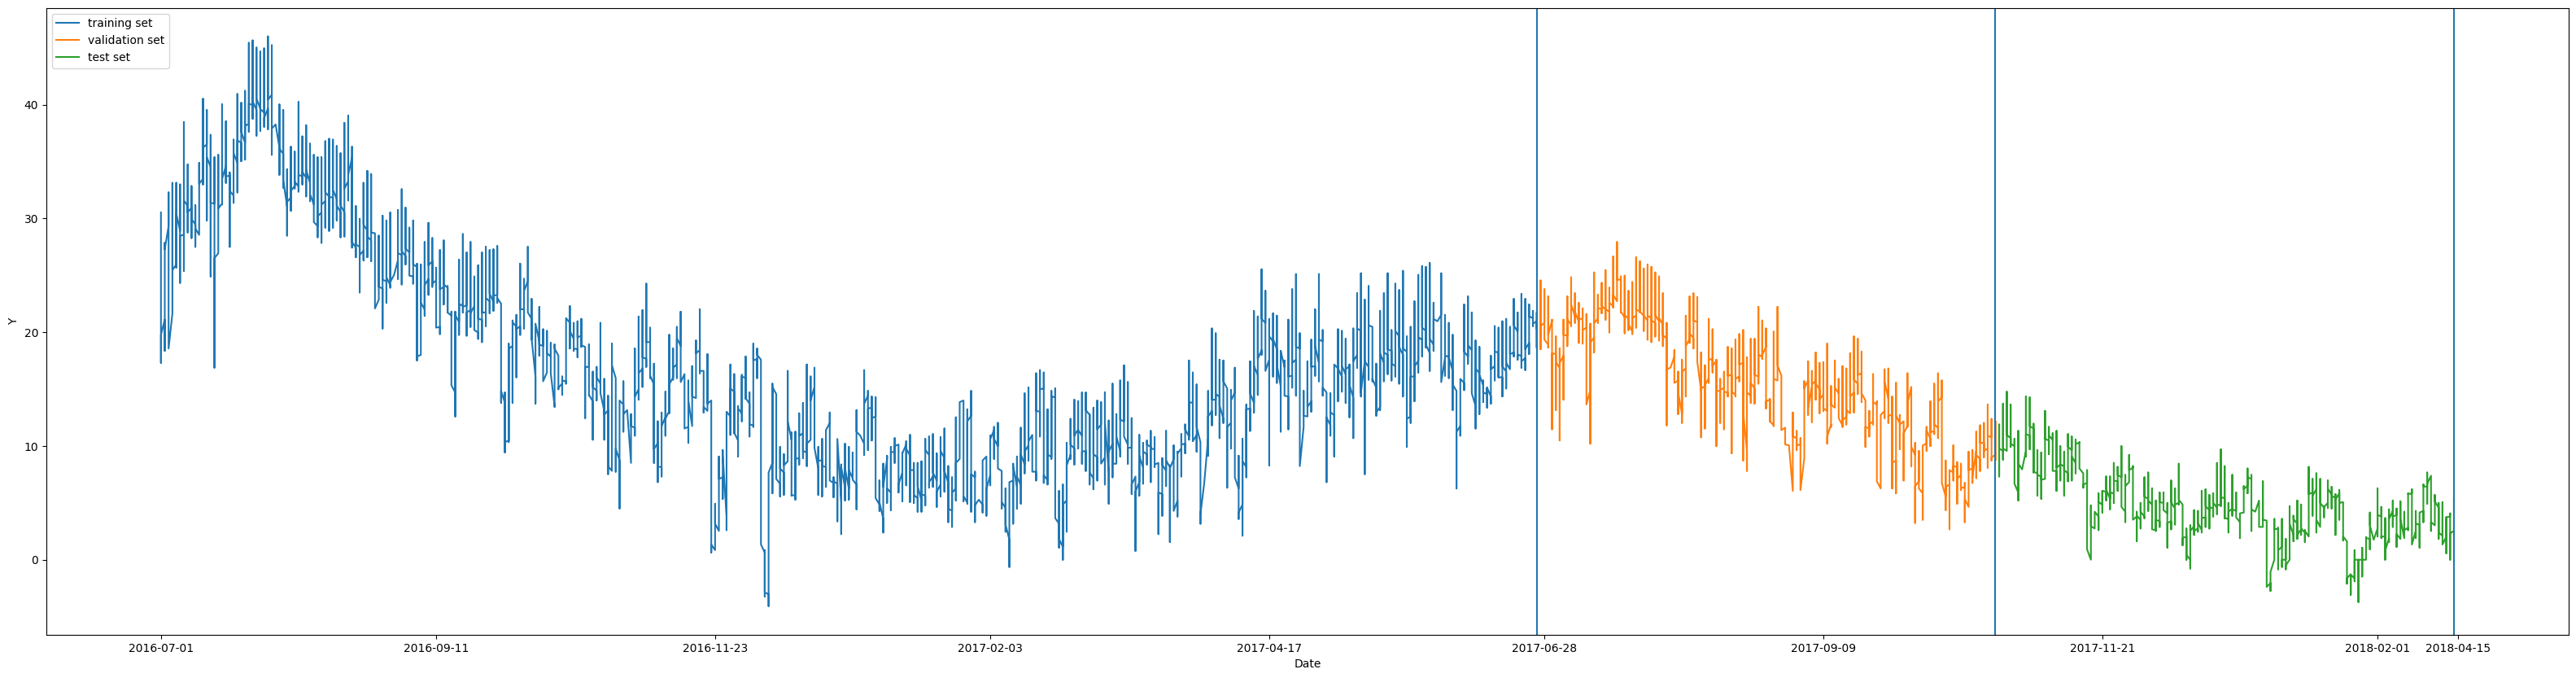

In [38]:
plt.figure(figsize=(40,10))
plt.plot(train.index, train['Y'], label='training set')
plt.plot(val.index, val['Y'], label='validation set')
plt.plot(test.index, test['Y'], label='test set')
plt.xticks(labels)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Y')
#vertical lines
for xs in dividList:
    plt.axvline(x=xs)
plt.show()

<h1>Question 1-3

<h2>Scaling data: For each of these datasets perform a standard scaling to scale each variable
independently i.e.,

<h2>z = (x - mean(x))/std(x)

<h2>Check if the standard scaling worked by computing the mean and standard deviation for a particular
variable within the data.

In [39]:
train_standard = (train-train.mean())/(train.std())
val_standard = (val-val.mean())/(val.std())
test_standard = (test-test.mean())/(test.std())

In [40]:
# train_norm.head()

<h3> Comparing data mean and variances for the train set, before and after standard scaling

In [41]:
trainMean_standard = []
trainMean_original = []

trainVar_standard = []
trainVar_original = []
for c in train.columns:
    var_standard = train_standard[c].var()
    mean_standard = train_standard[c].mean()

    var_non_stand = train[c].var()
    mean_non_stand = train[c].mean()
    
    trainVar_original.append(var_non_stand)
    trainVar_standard.append(var_standard)

    trainMean_original.append(mean_non_stand)
    trainMean_standard.append(mean_standard)

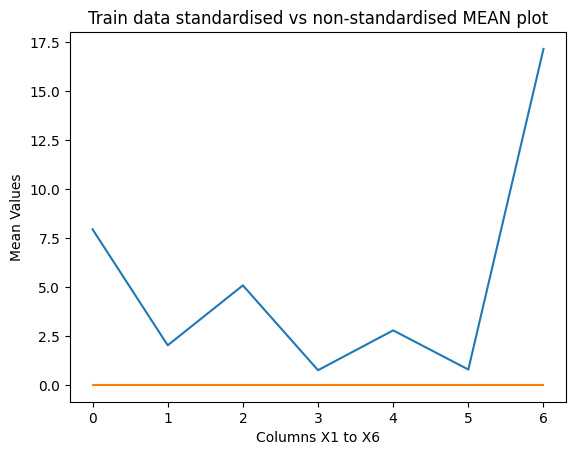

In [42]:
# sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.lineplot(trainMean_original)
sns.lineplot(trainMean_standard)
plt.title('Train data standardised vs non-standardised MEAN plot')
plt.xlabel('Columns X1 to X6')
plt.ylabel('Mean Values')
plt.show()

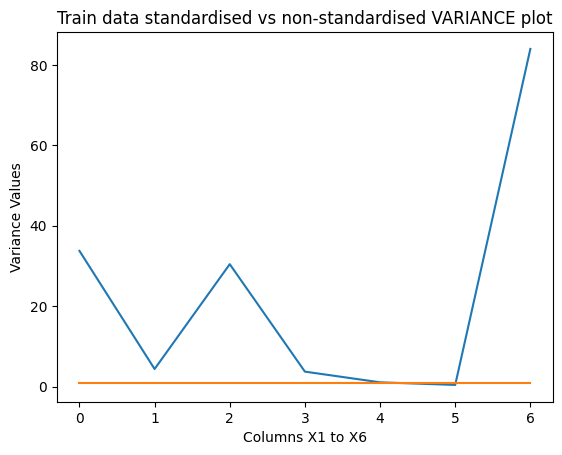

In [43]:
sns.lineplot(trainVar_original)
sns.lineplot(trainVar_standard)
plt.title('Train data standardised vs non-standardised VARIANCE plot')
plt.xlabel('Columns X1 to X6')
plt.ylabel('Variance Values')
plt.show()

<h3> After standardization, I'll plot the kernel density plots. The default strategy is scott but the default function does not always perform the best visual results which can be misleading. We can provide a bw_method param that can take a custom scaling as well, and using that we can control the smoothness. A lower value provides undersmoothing, and a huge one does oversmoothing.

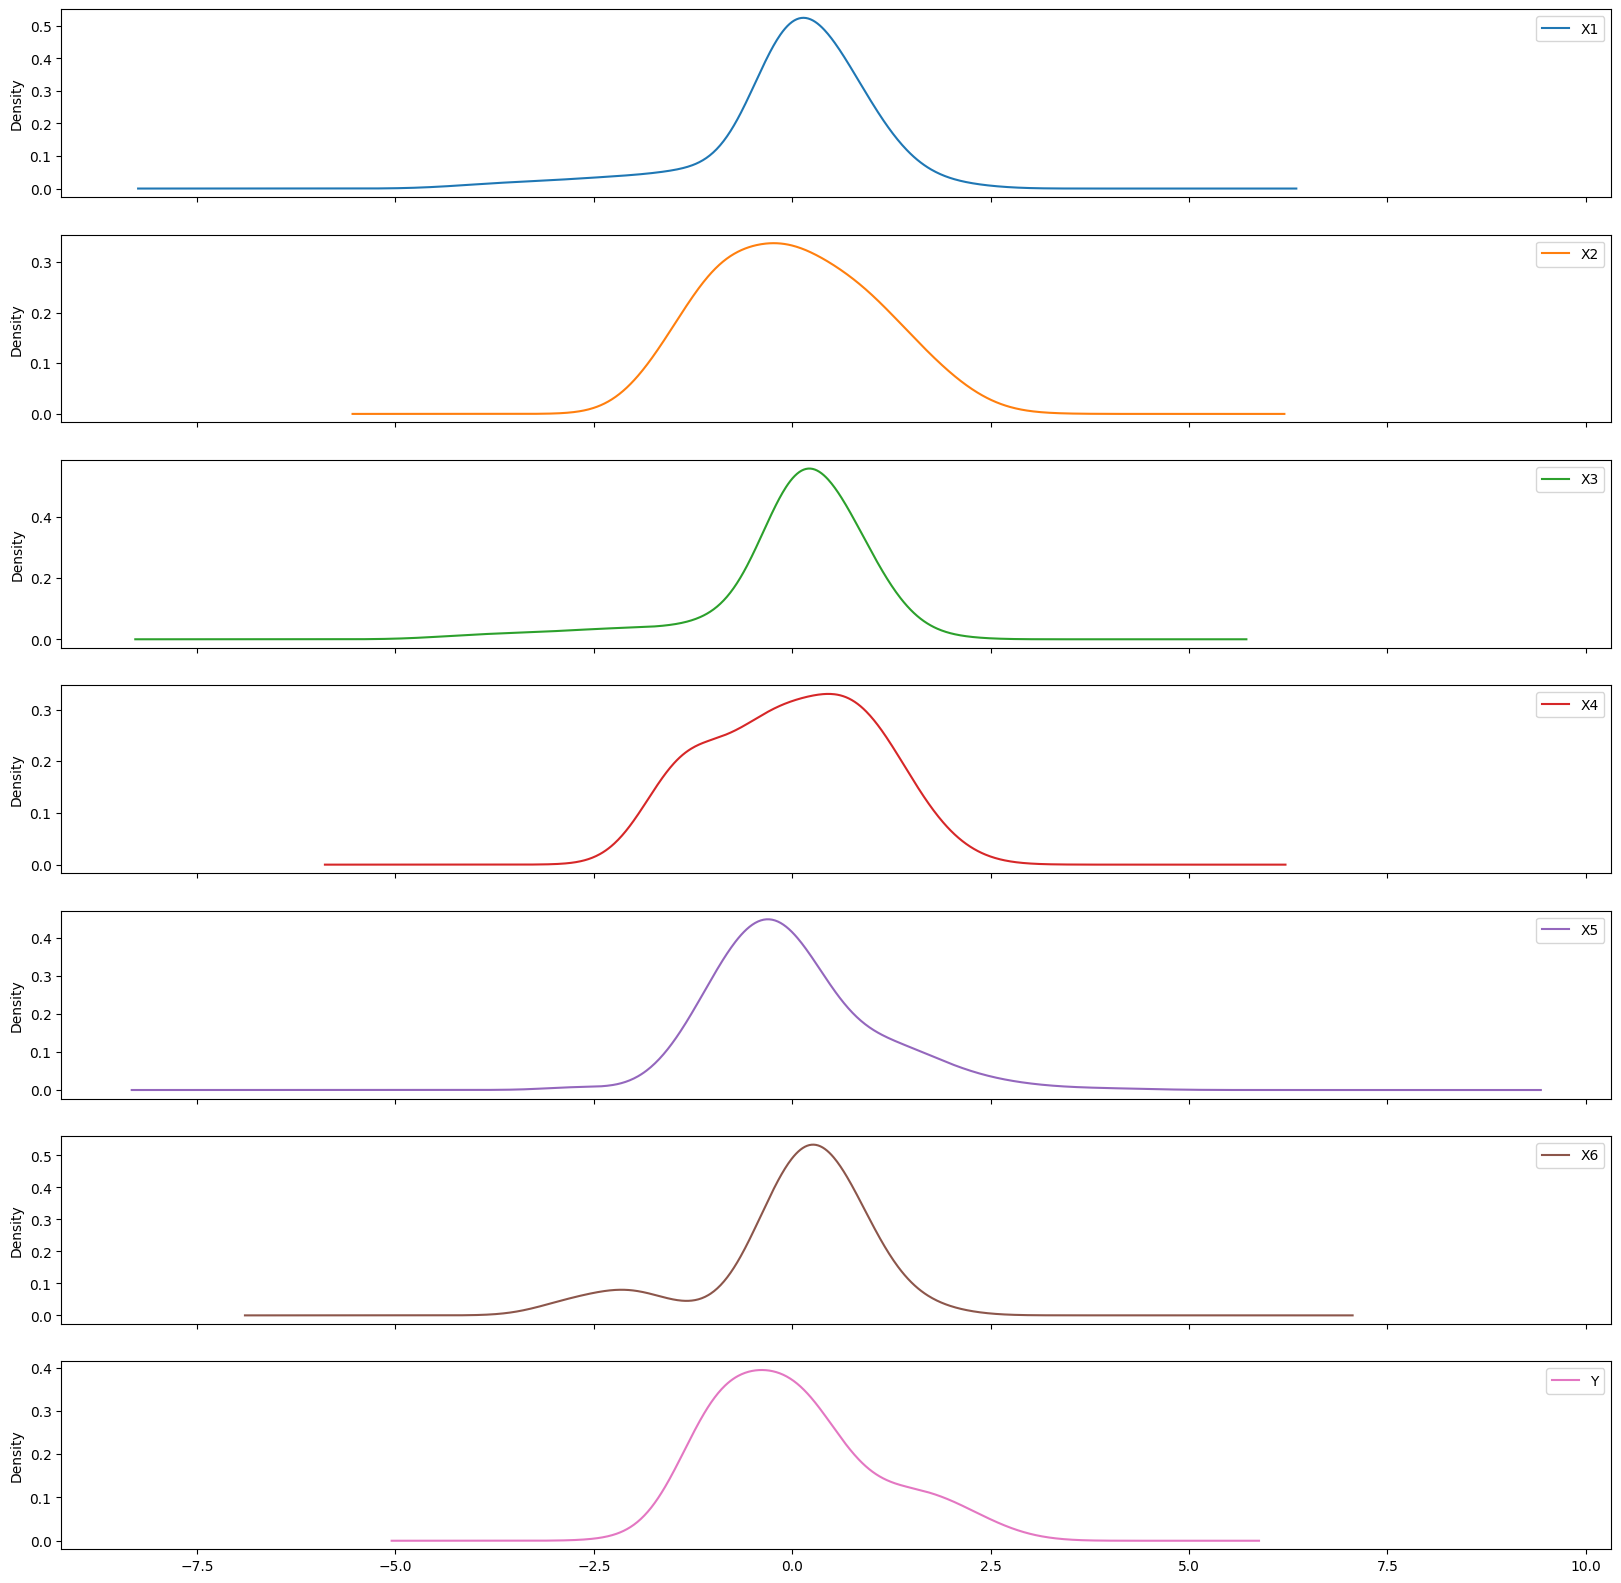

In [44]:
train_standard.plot.kde(figsize=(20,20), subplots=True, bw_method=0.4)
plt.show()

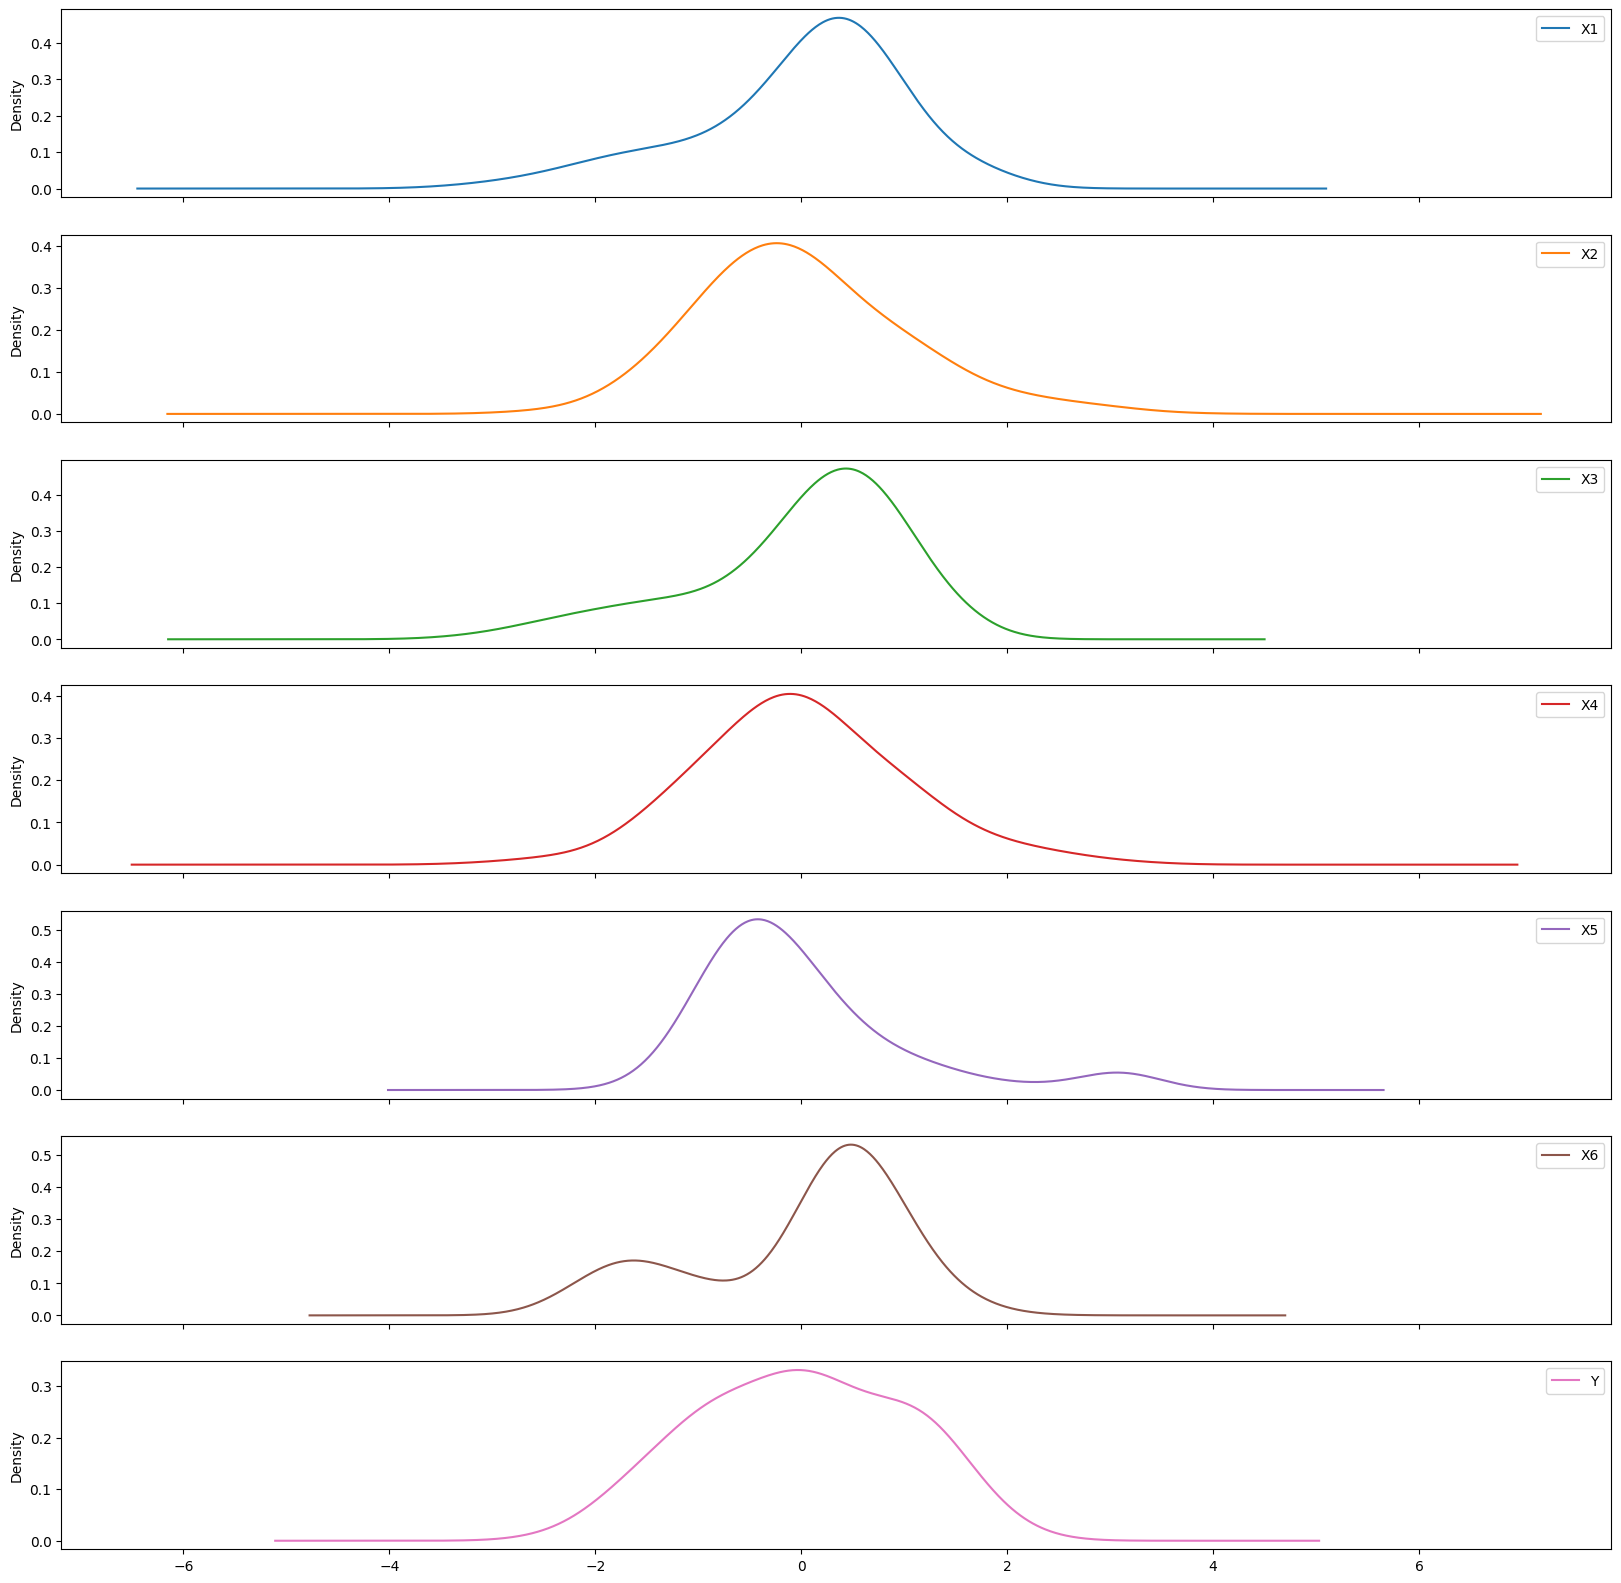

In [45]:
val_standard.plot.kde(figsize=(20,20), subplots=True, bw_method=0.4)
plt.show()

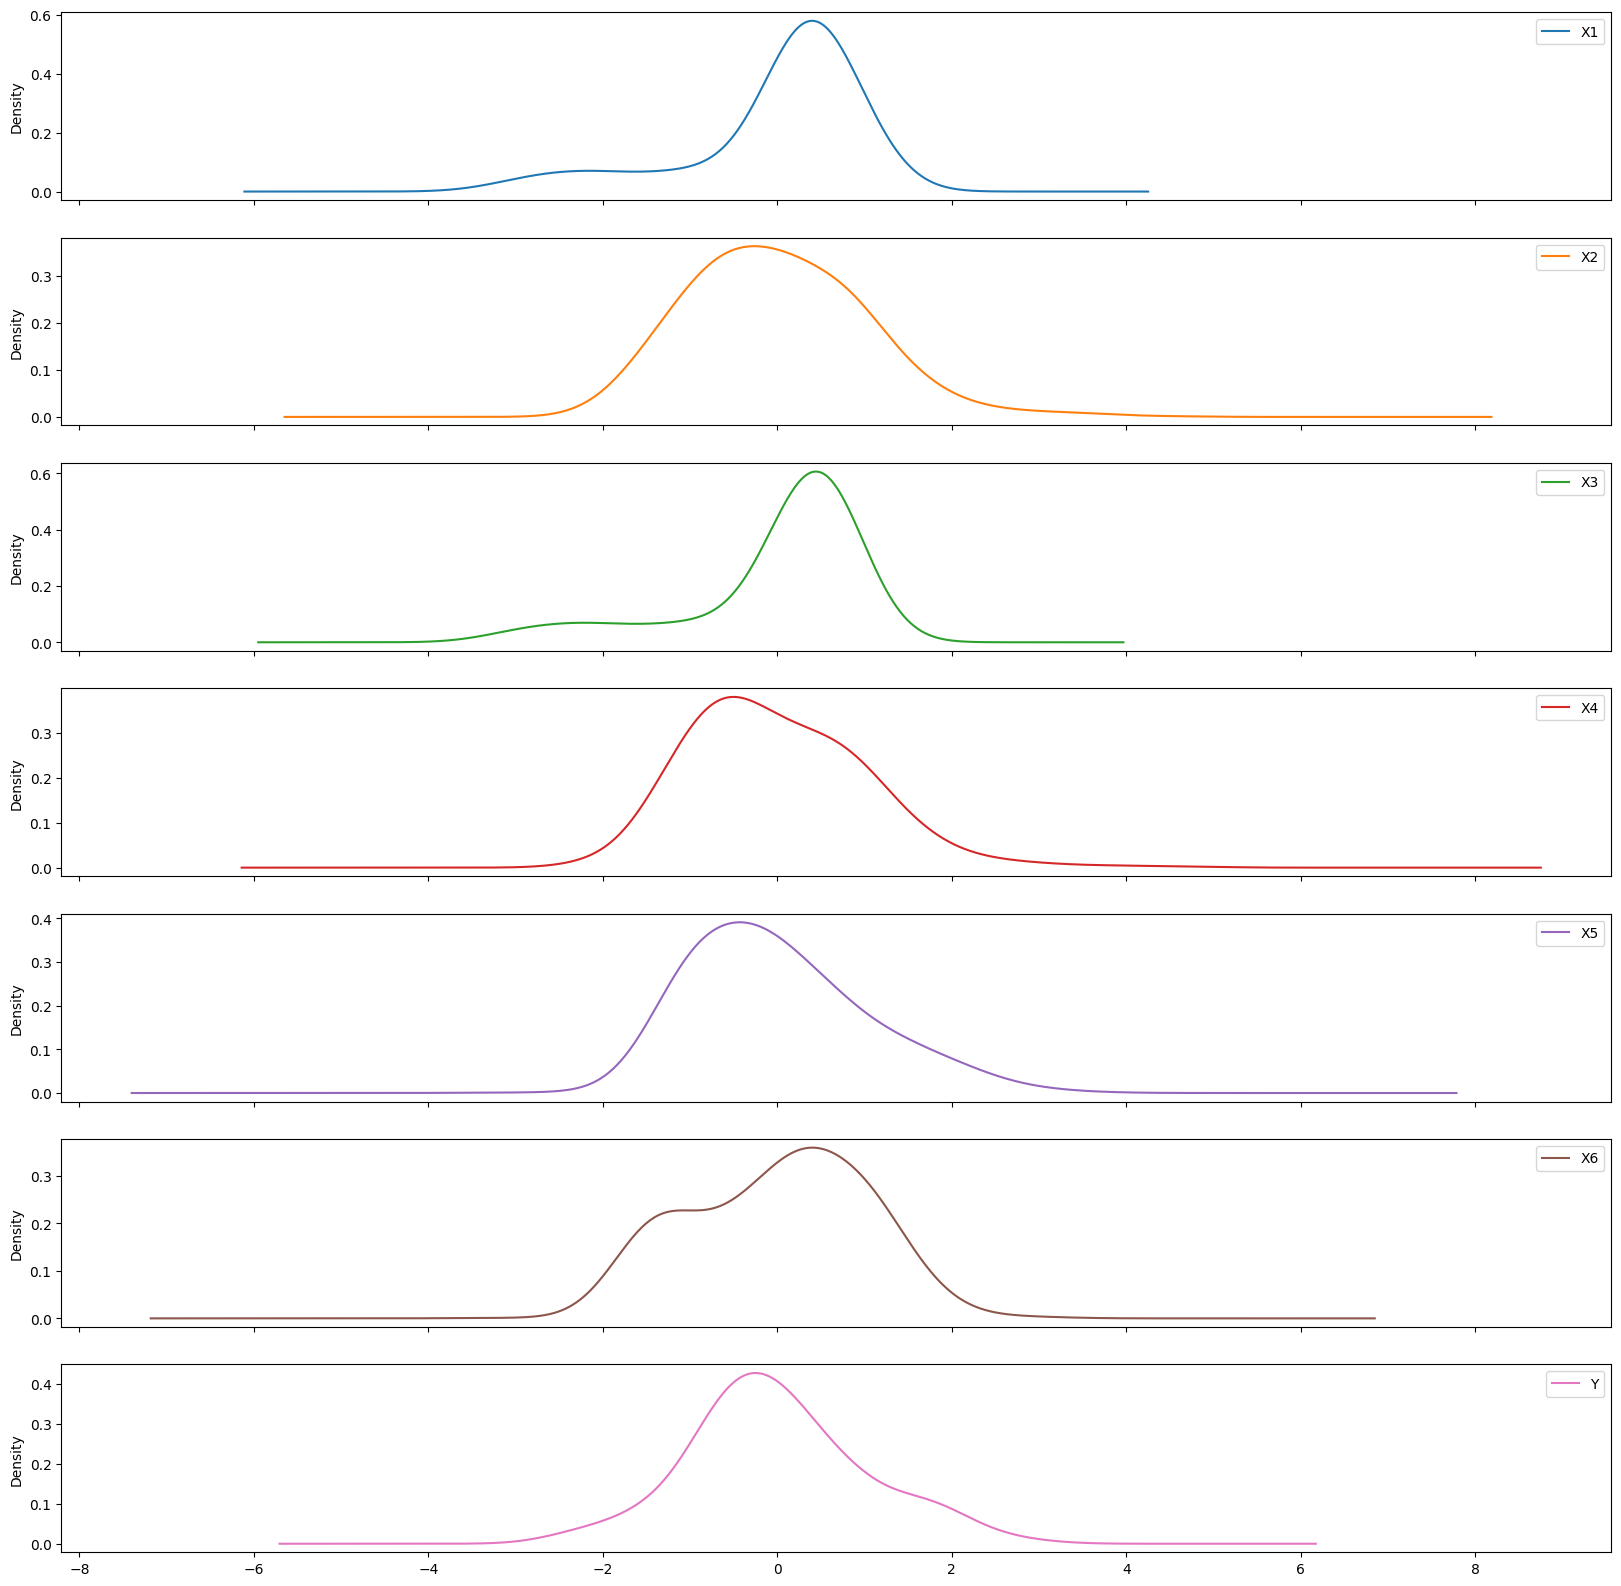

In [46]:
test_standard.plot.kde(figsize=(20,20), subplots=True, bw_method=0.4)
plt.show()

<h1> Question 1-4

<h2>Regression : Next, implement learn a linear regression model using Normal Equations using the
algorithm below.

<h2>For solving the Linear Equations (the function solve-SLE), use

<h2>a) Gaussian Elimination (implemented in pure python i.e., only numpy)

<h2>b) QR decomposition (implemented in pure python i.e., only numpy)

In [47]:
train_standard.head(10)

X1        X2        X3        X4        X5        X6  \
date                                                                     
2016-07-01 -0.362710 -0.005913 -0.630084 -0.149838  1.389195  0.876938   
2016-07-01 -0.385772  0.026177 -0.649475 -0.168529  1.329536  0.925915   
2016-07-01 -0.478019 -0.134274 -0.688076 -0.205391  0.972558  0.684189   
2016-07-01 -0.489550 -0.038003 -0.688076 -0.186700  1.001899  0.780564   
2016-07-01 -0.443426 -0.038003 -0.649475 -0.149838  1.061558  0.780564   
2016-07-01 -0.397303  0.058267 -0.642951 -0.112976  1.240536  0.925915   
2016-07-01 -0.132091  0.443348 -0.533489  0.016301  2.194107  1.695330   
2016-07-01 -0.085967  0.603798 -0.501230  0.145577  2.253766  2.273576   
2016-07-01 -0.408833  0.475438 -0.475496  0.219302  0.168625  1.022289   
2016-07-01 -0.581625  0.250807 -0.572091  0.034472 -0.100331  0.925915   

                   Y  
date                  
2016-07-01  1.461347  
2016-07-01  1.161972  
2016-07-01  1.161972  
2016-07-01  0.862706  
2016-07-01  0.524928  
2016-07-01  0.440483  
2016-07-01  0.617010  
2016-07-01  0.655413  
2016-07-01  0.494271  
2016-07-01  0.033753

In [48]:
y_train = train_standard['Y']
# train_xaxis = y_train.index
y_train = y_train.reset_index(drop=True)

In [49]:
y_val = val_standard['Y']
# val_xaxis = y_val.index
y_val = y_val.reset_index(drop=True)

In [50]:
y_test = test_standard['Y']
# test_xaxis = y_test.index
y_test = y_test.reset_index(drop=True)

In [51]:
x_train = train_standard[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
x_train = x_train.reset_index(drop=True)
x_train = x_train.to_numpy()
x_train = np.hstack((np.ones((len(x_train),1)),x_train))

In [52]:
x_val = val_standard[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
x_val = x_val.reset_index(drop=True)
x_val = x_val.to_numpy()
x_val = np.hstack((np.ones((len(x_val),1)),x_val))

In [53]:
x_test = test_standard[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
x_test = x_test.reset_index(drop=True)
x_test = x_test.to_numpy()
x_test = np.hstack((np.ones((len(x_test),1)),x_test))

<h3>Computing A

In [54]:
#computing A
A = np.dot(x_train.T, x_train)
# nicePrint(A)
print(A)

[[ 8.66400000e+03  4.76063633e-13  3.01980663e-14  1.77635684e-12
   6.25277607e-13 -2.79243295e-12  6.53699317e-13]
 [ 4.76063633e-13  8.66300000e+03  2.00066275e+03  8.52210829e+03
   1.26130554e+03  3.41789591e+03  9.72023407e+02]
 [ 3.01980663e-14  2.00066275e+03  8.66300000e+03  1.69219346e+03
   8.01188783e+03  2.02590925e+03  2.55572479e+03]
 [ 1.77635684e-12  8.52210829e+03  1.69219346e+03  8.66300000e+03
   1.22150215e+03  2.00800945e+03  3.32716445e+02]
 [ 6.25277607e-13  1.26130554e+03  8.01188783e+03  1.22150215e+03
   8.66300000e+03  4.22925007e+02 -3.61520791e+02]
 [-2.79243295e-12  3.41789591e+03  2.02590925e+03  2.00800945e+03
   4.22925007e+02  8.66300000e+03  3.73548541e+03]
 [ 6.53699317e-13  9.72023407e+02  2.55572479e+03  3.32716445e+02
  -3.61520791e+02  3.73548541e+03  8.66300000e+03]]


<h3> Computing b

In [55]:
#computing b
b = np.dot(x_train.T,y_train)
print(b)


[-3.07309733e-13  1.72675045e+03  5.20846310e+03  1.29726130e+03
  4.53567346e+03  2.73647832e+03  2.42528233e+03]


In [56]:
#Computing beta to verify with the calculated results from gaussian
# beta = np.dot(np.linalg.inv(A), b)
# beta

<h3> I learned gaussian elimination from the following theoretical and technical resources in order to implement Gaussain Elimination.

https://gist.github.com/num3ric/1357315

https://www.cliffsnotes.com/study-guides/algebra/linear-algebra/linear-systems/gaussian-elimination

https://www.youtube.com/watch?v=r89yH82OAFw&t=1s

In [57]:
def gaussianElimination(A, b, n):
    n =  len(A)
    k=0
    while k<n:
        for row in range(k+1, n):
            multiplier = A[row][k]/A[k][k]
            for col in range(k, n):
                A[row][col] = A[row][col] - multiplier*A[k][col]
            b[row] = b[row] - multiplier*b[k]
        k+=1
    x = np.zeros(n)
    k = n-1
    while k >= 0:
        x[k] = (b[k] - np.dot(A[k,k+1:],x[k+1:]))/A[k,k]
        k = k-1
    return x

In [58]:
beta = gaussianElimination(A,b, b.size)
print(beta)
# nicePrint(beta)


[-1.44371207e-17 -3.15373366e-04  2.25661046e-01  1.46149538e-02
  3.10183880e-01  1.80987385e-01  1.47761850e-01]


<h3><h3> I learned QR decomposition from the following theoretical and technical resources in order to implement QR Decomposition.

https://python.quantecon.org/qr_decomp.html

https://www.math.ucla.edu/~yanovsky/Teaching/Math151B/handouts/GramSchmidt.pdf

In [59]:
def qrDecom(A):
    (num_rows, num_cols) = np.shape(A)
    Q = np.empty([num_rows, num_rows])
    columnNumber = 0
    for a in A.T:
        u = a
        for i in range(0, columnNumber):
            proj = np.dot(np.dot(Q[:, i].T, a), Q[:, i])
            u = u - proj
        e = u / np.linalg.norm(u)
        Q[:, columnNumber] = e
        columnNumber += 1
    R = np.dot(Q.T, A)

    return Q, R

<h3> Printing Q and R matrices using the custom funciton nicePrint() for easy readability of matrices, and below we can see the diagonal nature of Q matrix and 0 lower triangle in R matrix as expected.

In [60]:
Q, R = qrDecom(A)
# np.dot(Q,R)
# Q,R
print('Q matrix:')
nicePrint(Q)
print()
print('R matrix:')
nicePrint(R)

Q matrix:
[[1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
 [0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
 [0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000]
 [0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000]
 [0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000]
 [0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 -0.0000]
 [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000]]

R matrix:
[[8664.0000 0.0000 0.0000 0.0000 0.0000 -0.0000 0.0000]
 [0.0000 8663.0000 2000.6627 8522.1083 1261.3055 3417.8959 972.0234]
 [0.0000 0.0000 8200.9601 -275.9313 7720.5976 1236.5687 2331.2424]
 [0.0000 0.0000 0.0000 270.2080 240.4789 -1312.6933 -545.0609]
 [0.0000 0.0000 0.0000 0.0000 996.9653 -70.5811 -2212.6450]
 [0.0000 0.0000 0.0000 0.0000 0.0000 745.8790 195.8730]
 [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1829.6160]]


<h3> Computing beta from Q and R.

In [61]:
beta = np.dot(np.linalg.inv(np.dot(Q,R)), b)
print('Beta computed from QR and b')
beta

Beta computed from QR and b


array([-1.44371207e-17, -3.15373366e-04,  2.25661046e-01,  1.46149538e-02,
        3.10183880e-01,  1.80987385e-01,  1.47761850e-01])

<h1> Question 1-5

<h2>Loss: Use the parameters (βˆ) learned to calculate the Mean Absolute Error (MAE) on train,
validation and test split for the dataset. Additionally, plot the true target and the predicted target for the
train, validation and test splits.

<h3>Training Set

MSE for training set:  0.6011903134615219


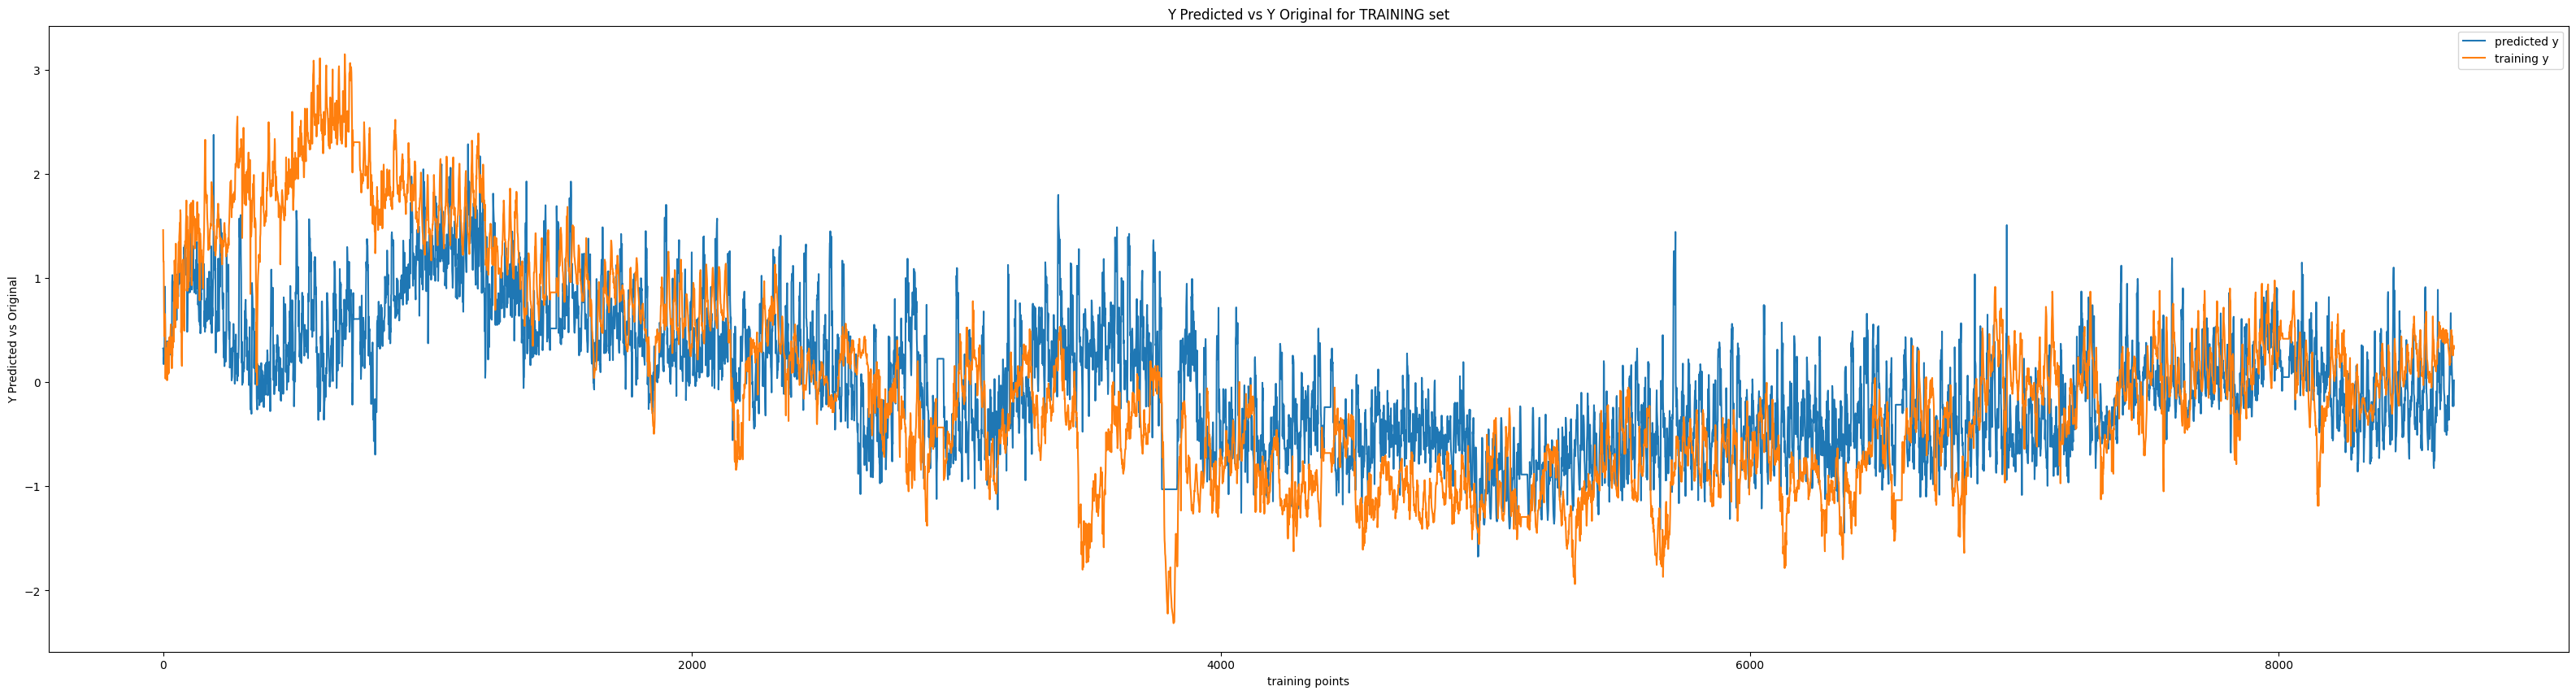

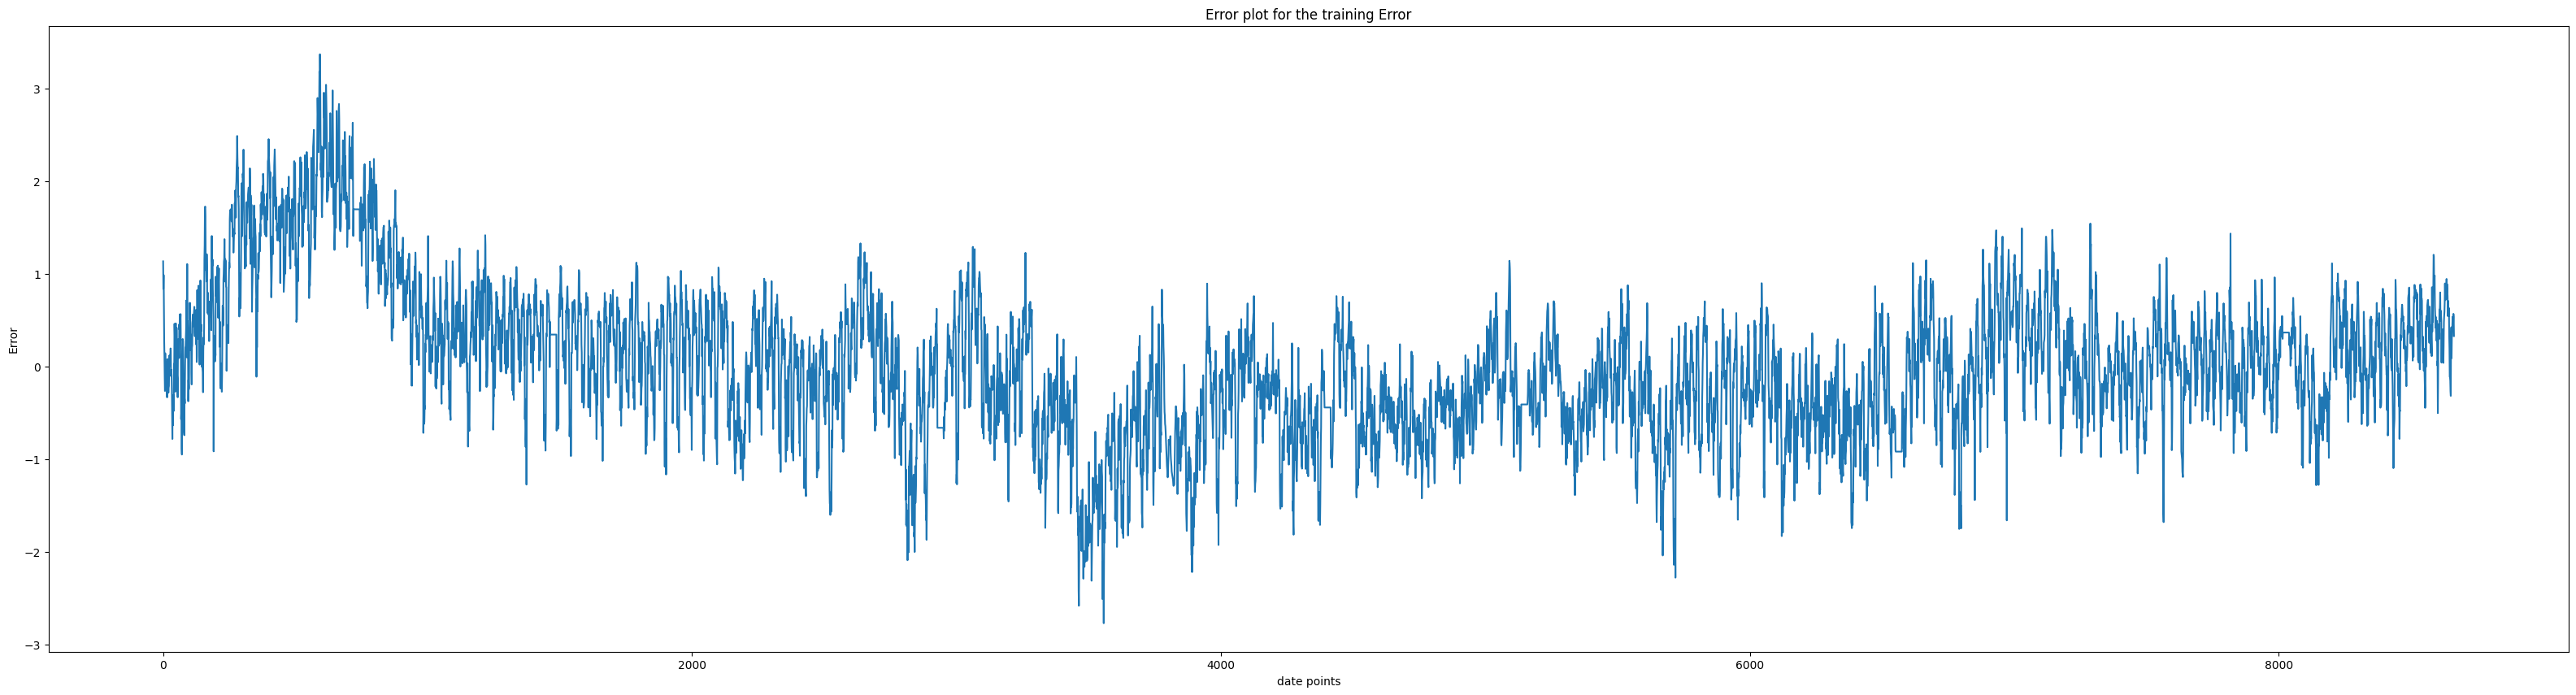

In [62]:
y_pred_train = np.dot(x_train, beta)
diffTrain = y_train -  y_pred_train
mse = (1/len(y_train))*np.dot((diffTrain).T, (diffTrain))
print('MSE for training set: ', mse)

plt.figure(figsize=(40,10))
plt.plot(y_pred_train, label='predicted y')
plt.plot(y_train, label='training y')
plt.title('Y Predicted vs Y Original for TRAINING set')
plt.legend()
plt.xlabel('training points')
plt.ylabel('Y Predicted vs Original')
plt.show()

diffTrain = y_train -  y_pred_train
plt.figure(figsize=(40,10))
plt.plot(diffTrain, label='Error')
plt.title('Error plot for the training Error')
plt.xlabel('date points')
plt.ylabel('Error')
plt.show()

<h3>Validation Set

MSE for validation set:  1.027039269140015


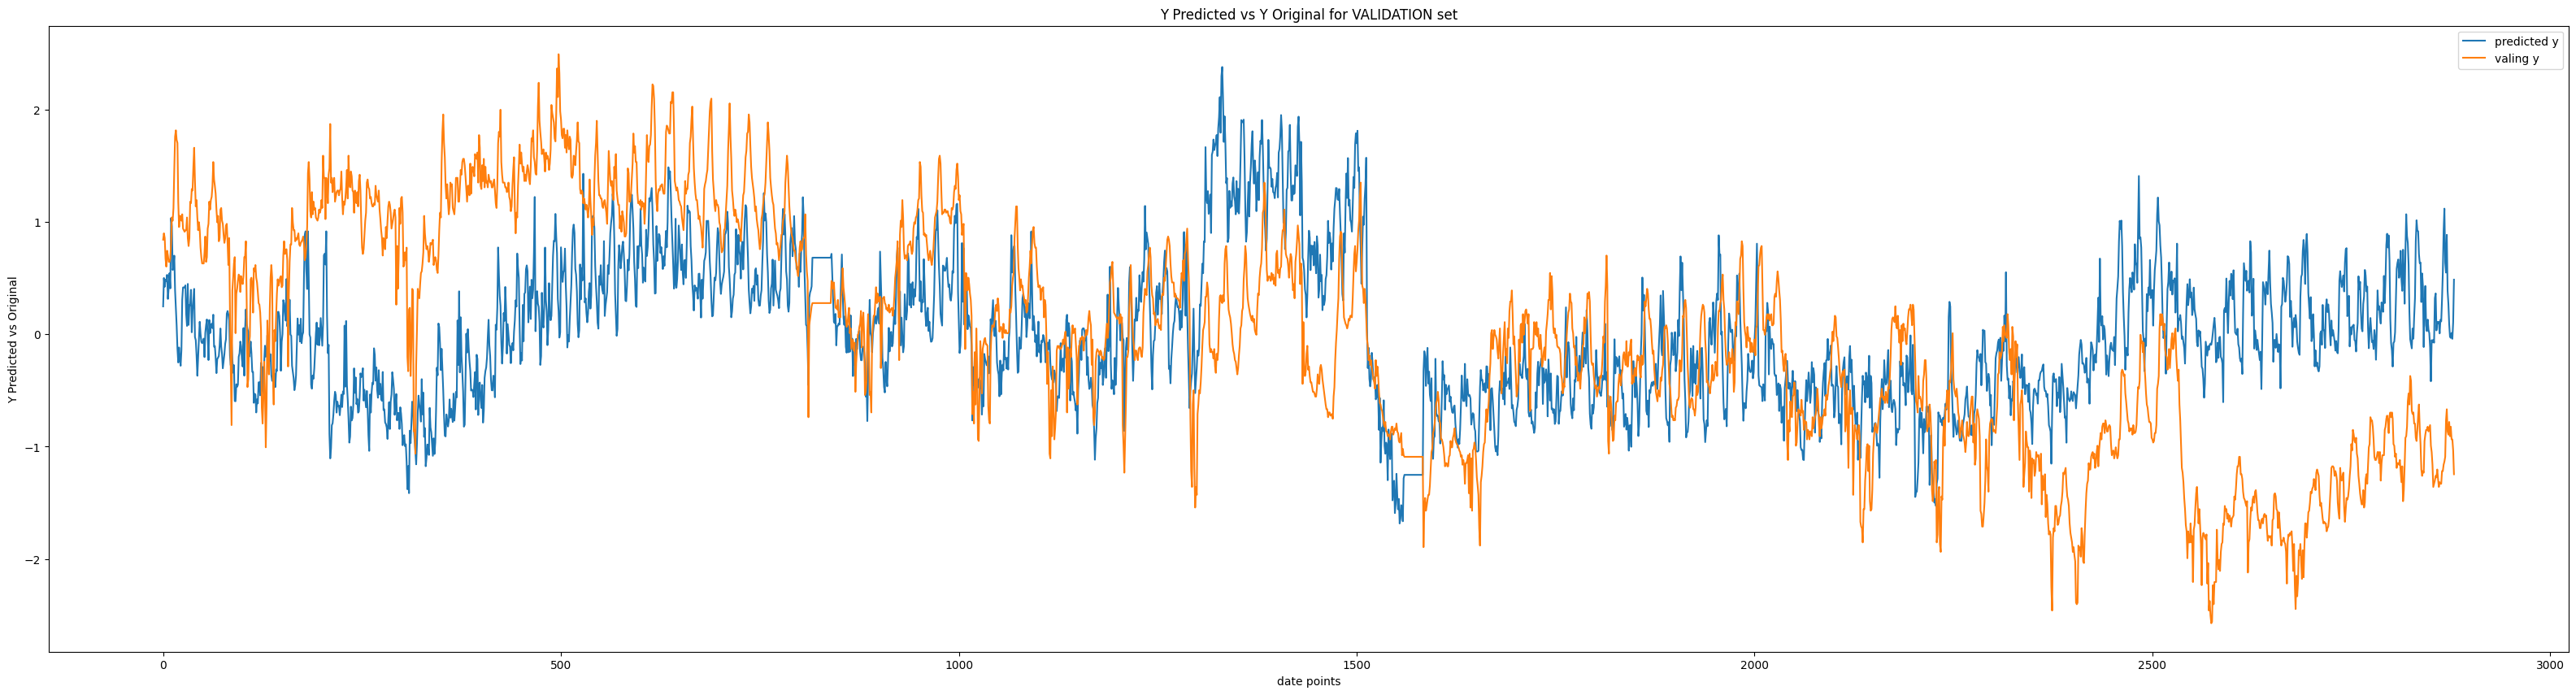

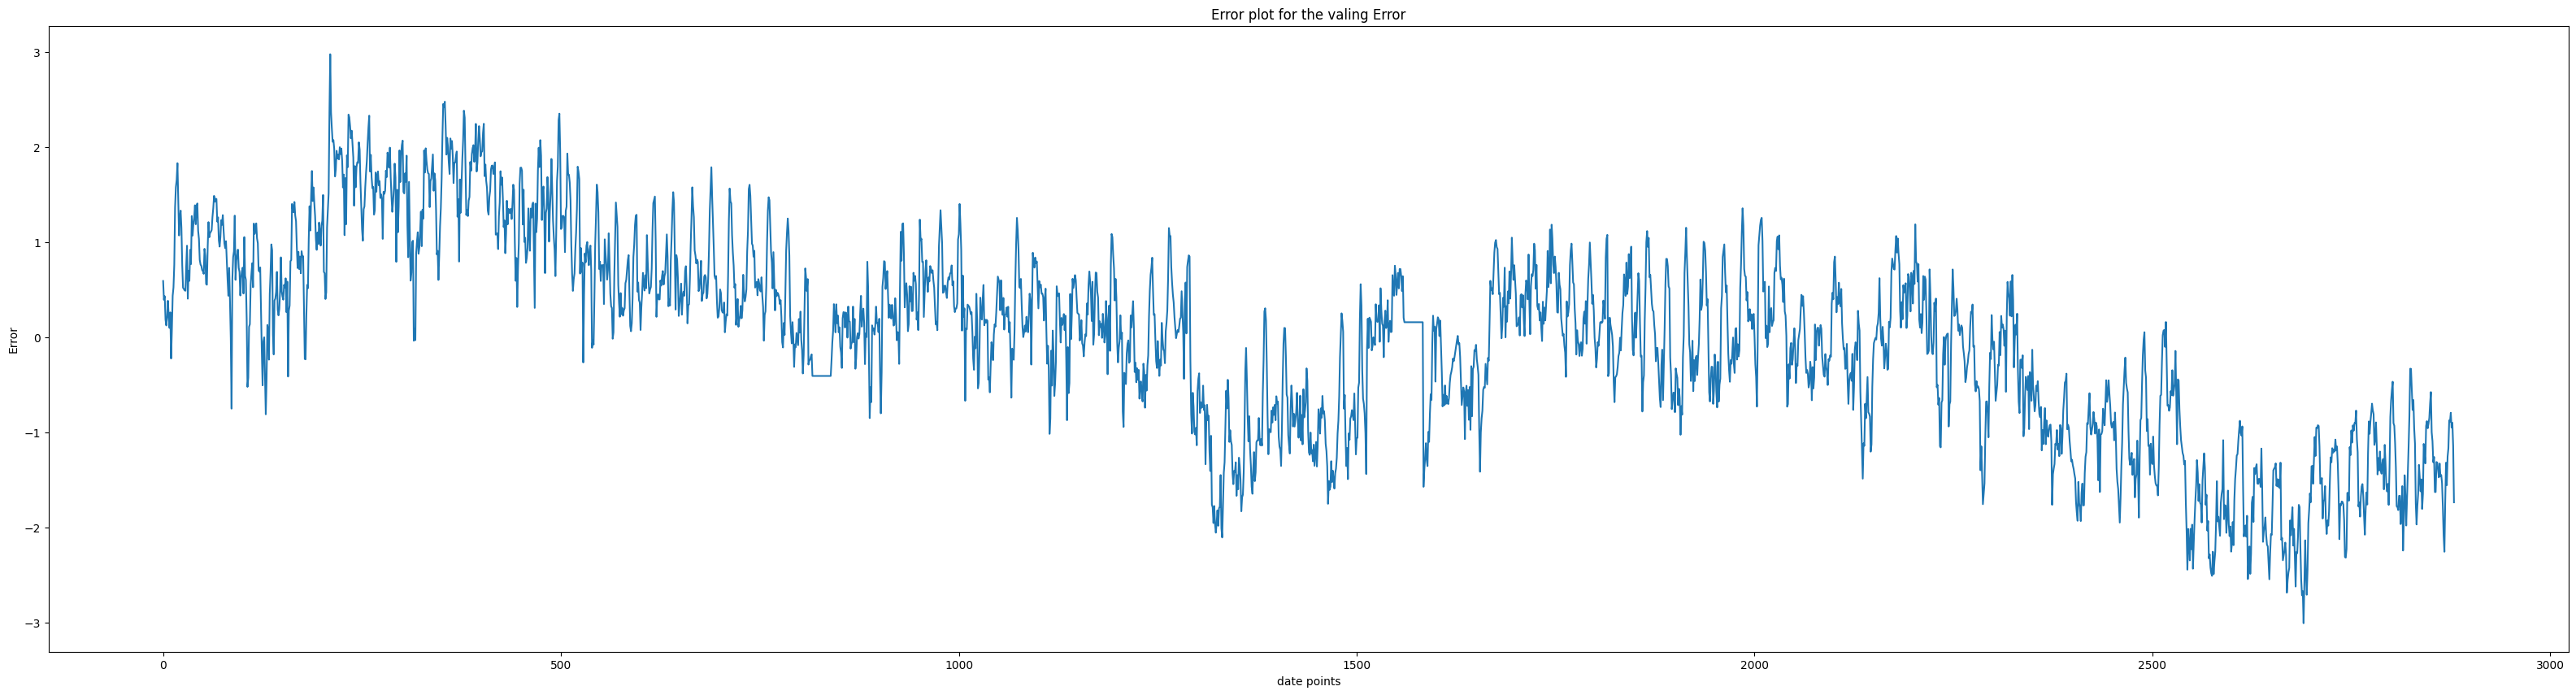

In [63]:
y_pred_val = np.dot(x_val, beta)
diffval = y_val -  y_pred_val
mse = (1/len(y_val))*np.dot((diffval).T, (diffval))
print('MSE for validation set: ', mse)

plt.figure(figsize=(40,10))
plt.plot(y_pred_val, label='predicted y')
plt.plot(y_val, label='valing y')
plt.title('Y Predicted vs Y Original for VALIDATION set')
plt.legend()
plt.xlabel('date points')
plt.ylabel('Y Predicted vs Original')
plt.show()

diffval = y_val -  y_pred_val
plt.figure(figsize=(40,10))
plt.plot(diffval, label='Error')
plt.title('Error plot for the valing Error')
plt.xlabel('date points')
plt.ylabel('Error')
plt.show()

<h3>Test Set

MSE for testing set:  1.4268544844176834


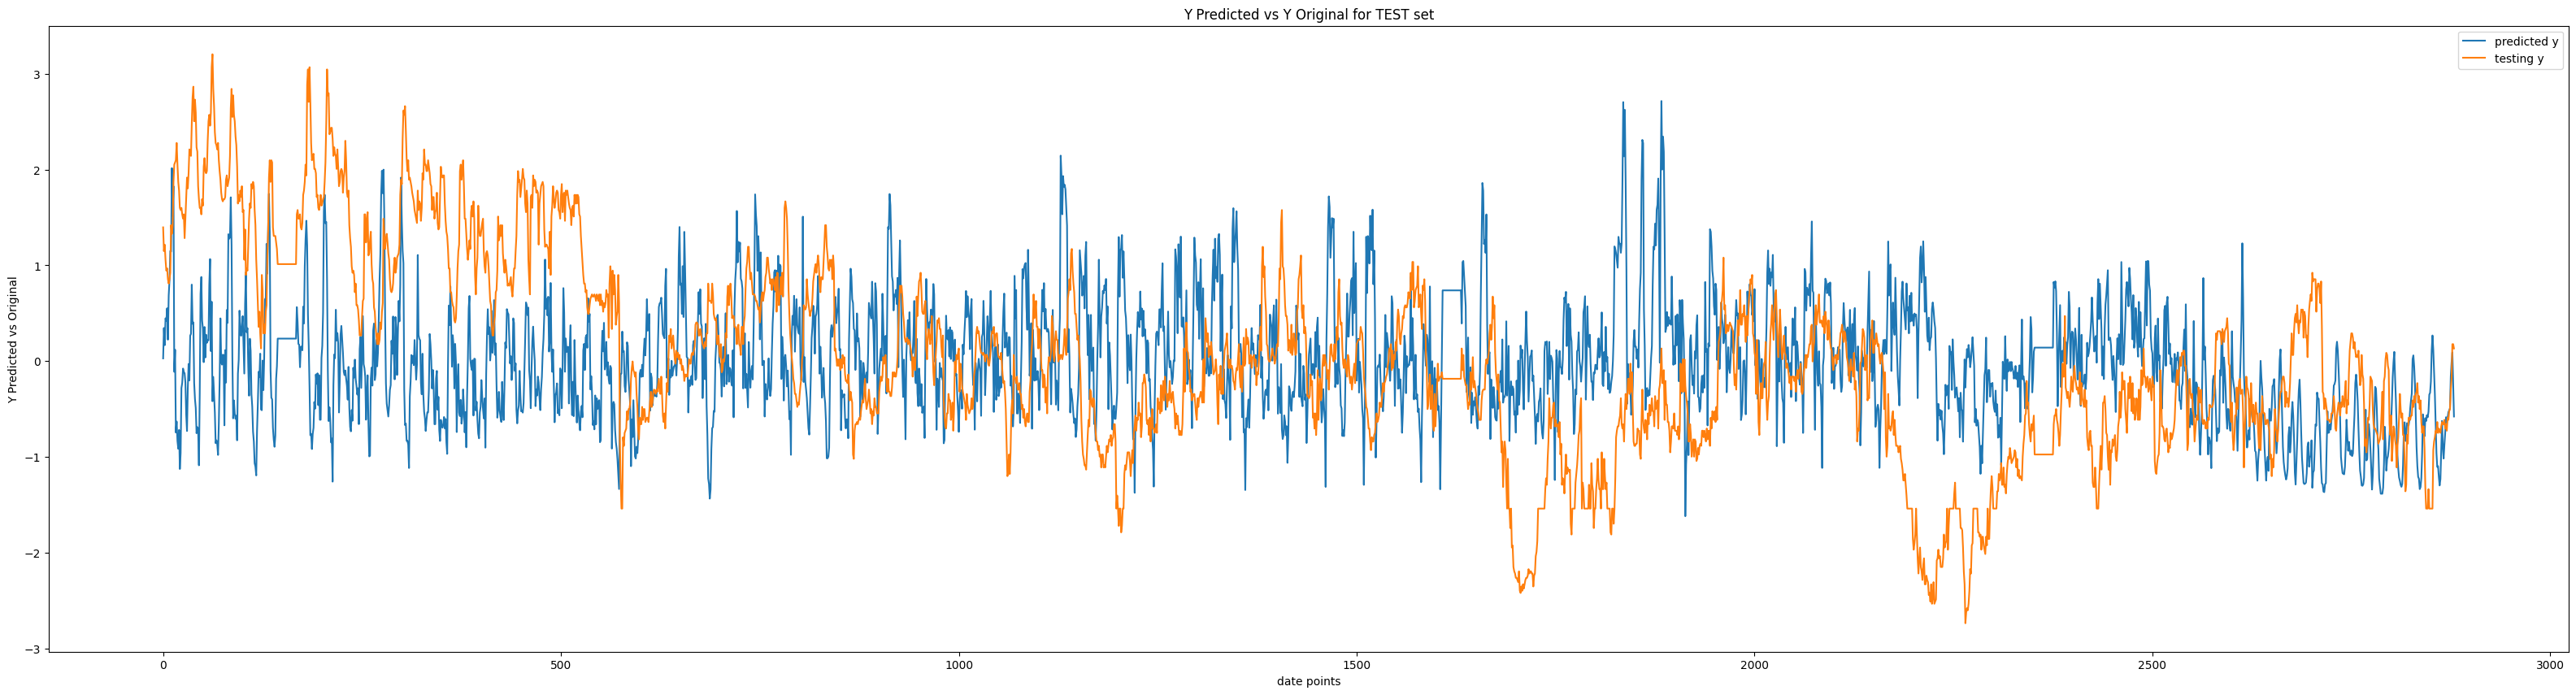

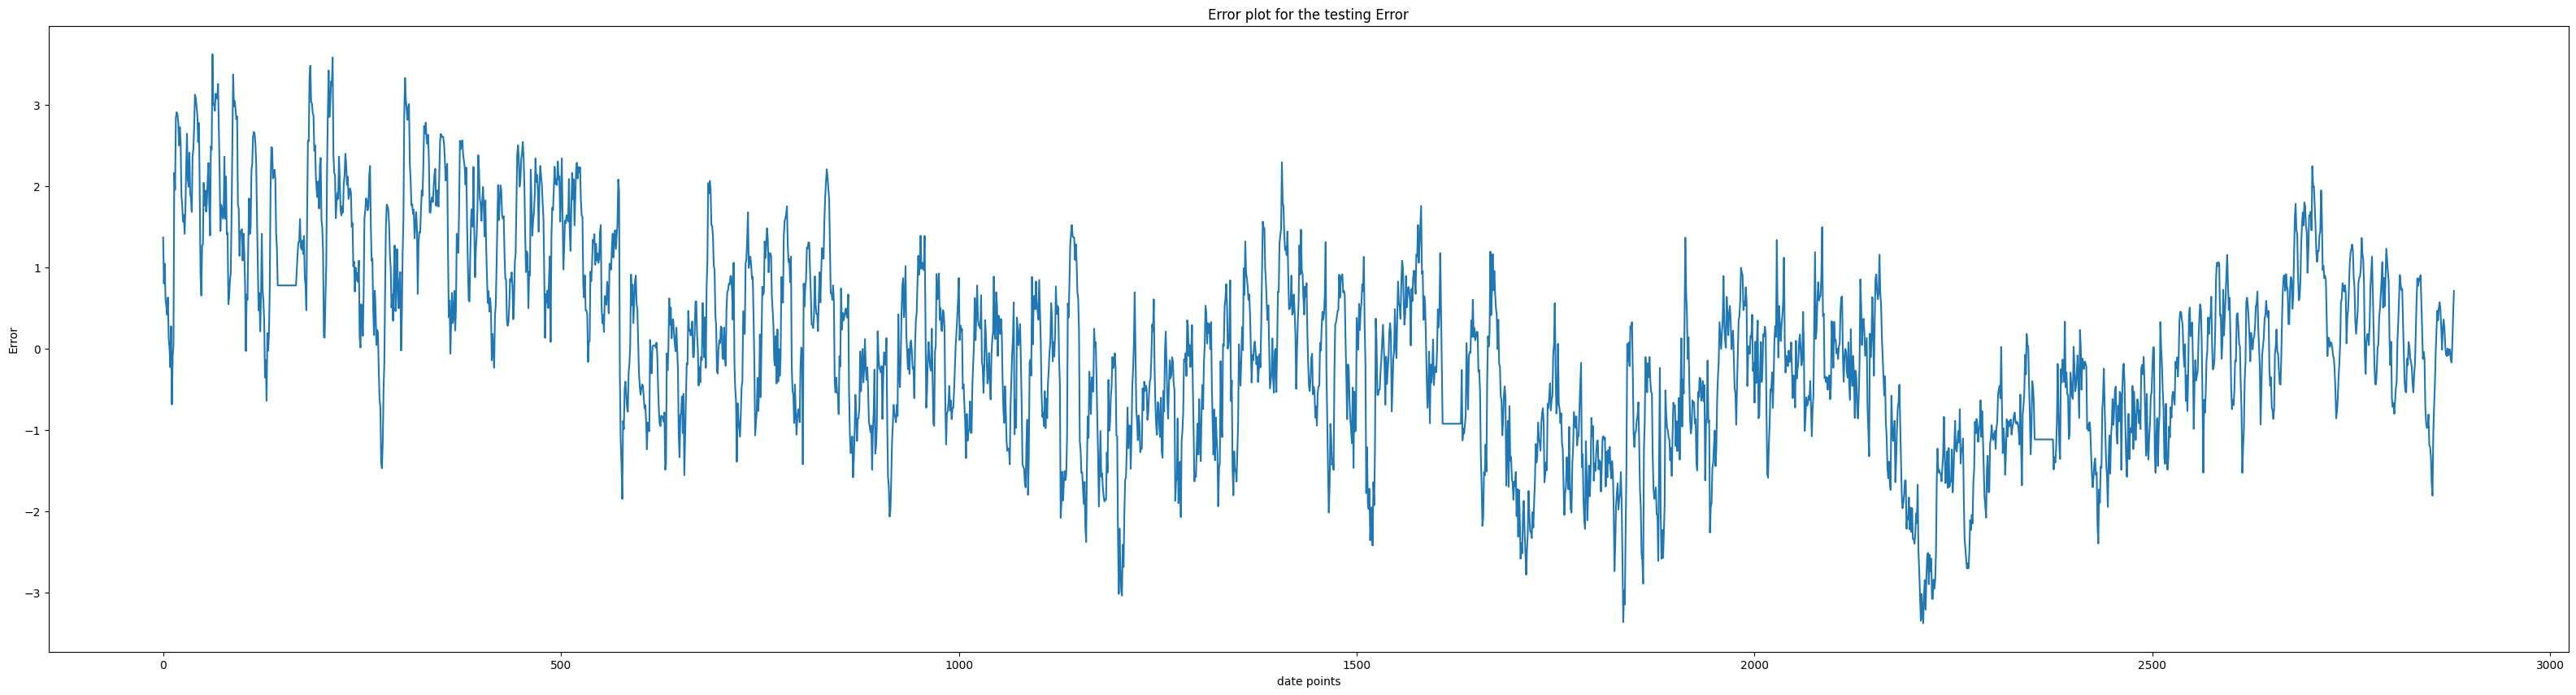

In [64]:
y_pred_test = np.dot(x_test, beta)
difftest = y_test -  y_pred_test
mse = (1/len(y_test))*np.dot((difftest).T, (difftest))
print('MSE for testing set: ', mse)

plt.figure(figsize=(40,10))
plt.plot(y_pred_test, label='predicted y')
plt.plot(y_test, label='testing y')
plt.title('Y Predicted vs Y Original for TEST set')
plt.legend()
plt.xlabel('date points')
plt.ylabel('Y Predicted vs Original')
plt.show()

difftest = y_test -  y_pred_test
plt.figure(figsize=(40,10))
plt.plot(difftest, label='Error')
plt.title('Error plot for the testing Error')
plt.xlabel('date points')
plt.ylabel('Error')
plt.show()